### Preliminaries
-Loading packages and files

-cleaning and combining data

-exploring data and features

#### Load files and Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import datetime


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
features = pd.read_csv("/content/drive/My Drive/data/features.csv")
prices = pd.read_csv("/content/drive/My Drive/data/prices.csv",index_col='date')
sp = pd.read_csv("/content/drive/My Drive/data/sp.csv")

#### Basic Inspection of Price and Features

In [ ]:
#inspect prices data
features

date    stock_id      volume  ...  series_13  series_14  series_15
0        2010-04-20     stock_0  640251.219  ...    30.6128    80.9191        1.0
1        2010-04-20     stock_1   24091.968  ...    31.0142    80.8656        1.0
2        2010-04-20     stock_2   10889.120  ...    31.2305    69.0728        1.0
3        2010-04-20     stock_4   31656.532  ...    29.0051    81.9215        0.0
4        2010-04-20    stock_10   18232.416  ...    29.8839    80.8548        0.0
...             ...         ...         ...  ...        ...        ...        ...
2085695  2019-05-08  stock_1359  133340.928  ...    30.5772    81.9660        1.0
2085696  2019-05-08  stock_1360  158065.776  ...    28.5511    82.0154        0.0
2085697  2019-05-08  stock_1361  188405.184  ...    33.3921    69.3405        3.0
2085698  2019-05-08  stock_1362  277042.293  ...    29.0687    83.1087        0.0
2085699  2019-05-08  stock_1363  127738.368  ...    28.9874    82.2260        1.0

[2085700 rows x 18 columns]

Want to be able to predict if daily return of a stock increases or decrease using the features data above. In this case we have 15 features for a stock and the volume.  

In [ ]:
features.describe()

volume      series_1  ...     series_14     series_15
count  2.085700e+06  2.085700e+06  ...  2.085700e+06  2.085700e+06
mean   1.719458e+05  6.576534e+08  ...  7.532686e+01  1.133740e+00
std    1.333958e+06  1.175891e+10  ...  9.244665e+00  1.146281e+00
min    0.000000e+00 -9.168857e+11  ...  1.932410e+01  0.000000e+00
25%    2.152853e+04 -6.857930e+08  ...  7.246110e+01  0.000000e+00
50%    5.548010e+04  1.079853e+08  ...  7.883390e+01  1.000000e+00
75%    1.420697e+05  1.271818e+09  ...  8.167940e+01  2.000000e+00
max    2.091296e+08  8.846265e+11  ...  1.000000e+02  5.000000e+00

[8 rows x 16 columns]

Features data has different scales, would be appriorate to standardise/normalise. Some are also seem skewed such as series 3.

In [ ]:
#inspect prices data
prices

stock_0  stock_1  stock_2  ...  stock_1362  stock_1363  stock_1364
date                                   ...                                    
2010-02-01  4453.62      NaN      NaN  ...         NaN         NaN         NaN
2010-02-02  4545.04      NaN      NaN  ...         NaN         NaN         NaN
2010-02-03  4536.11      NaN      NaN  ...         NaN         NaN         NaN
2010-02-04  4296.21      NaN      NaN  ...         NaN         NaN         NaN
2010-02-05  4265.96      NaN      NaN  ...         NaN         NaN         NaN
...             ...      ...      ...  ...         ...         ...         ...
2020-06-29  1609.43      NaN      NaN  ...      448.73         NaN         NaN
2020-06-30  1643.39      NaN      NaN  ...      465.93         NaN         NaN
2020-07-01  1583.52      NaN      NaN  ...      466.44         NaN         NaN
2020-07-02  1606.75      NaN      NaN  ...      468.04         NaN         NaN
2020-07-03  1606.75      NaN      NaN  ...      468.04         NaN         NaN

[2720 rows x 1365 columns]

Have the prices for 1365 stocks, for a variety of dates.

#### Investigation of SP data-set

Calculate percentage change in the market. 

In [ ]:
sp['sp_percentage_ch'] = sp['S&PCOMP'].pct_change().shift(-1)
sp['date'] = pd.to_datetime(sp['date'])
sp_res=sp[np.abs(sp['sp_percentage_ch'])<0.001]

In [ ]:
sp

date  S&PCOMP  sp_percentage_ch
0    2010-01-01  1115.10          0.016043
1    2010-01-04  1132.99          0.003116
2    2010-01-05  1136.52          0.000546
3    2010-01-06  1137.14          0.004001
4    2010-01-07  1141.69          0.002882
...         ...      ...               ...
2766 2020-08-10  3360.47         -0.007969
2767 2020-08-11  3333.69          0.013997
2768 2020-08-12  3380.35         -0.002047
2769 2020-08-13  3373.43         -0.000172
2770 2020-08-14  3372.85               NaN

[2771 rows x 3 columns]

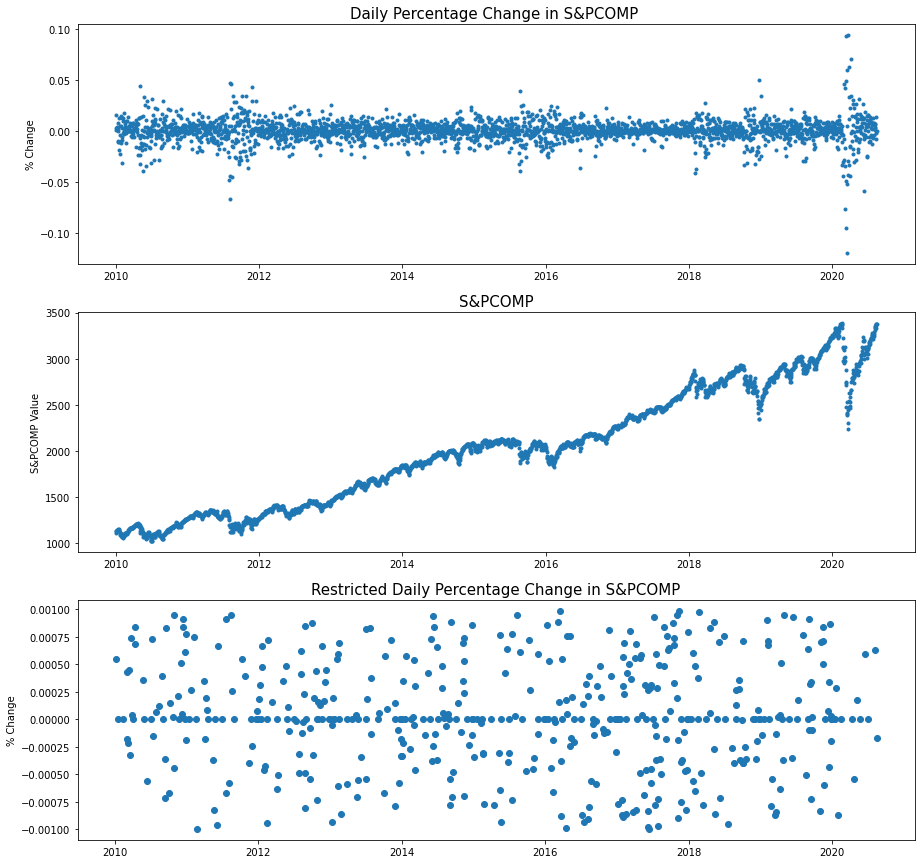

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize =(15,15))
ax1.plot_date(sp['date'],sp['sp_percentage_ch'],xdate=True, ms=3)
ax1.set_title('Daily Percentage Change in S&PCOMP ',fontsize=15)
ax1.set_ylabel('% Change')
ax2.plot_date(sp['date'],sp['S&PCOMP'],xdate=True,ms=3)
ax2.set_title('S&PCOMP',fontsize=15)
ax2.set_ylabel('S&PCOMP Value')
ax3.plot_date(sp_res['date'],sp_res['sp_percentage_ch'],xdate=True)
ax3.set_title('Restricted Daily Percentage Change in S&PCOMP',fontsize=15)
ax3.set_ylabel('% Change')
plt.show()

Interesting to see the how the S&PCOMP changes as an indicator to what the market is doing. Want a martet neutral model i.e in this case no correlation to S&P change. 

#### Combine data sets

Create data frames with percentage change in stocks for Daily and Weekly returns .

In [ ]:
prices_daily=prices.pct_change().shift(-1)
prices_weekly=prices.pct_change(periods=7).shift(-7)

Combine daily returns data for stocks with features DF on stock_id and date, removing rows with no daily return data. Also create sign of daily return column and merge sp data for future comparasion. 

In [ ]:
prices_daily_melted=pd.melt(prices_daily,var_name='stock_id', value_name='daily_return',ignore_index=False)
combo = features.merge(prices_daily_melted,on=['date','stock_id']).dropna(subset=['daily_return'])
combo['sign_daily_return'] = np.where(combo['daily_return']>=0, 1, -1)
#set dates to pandas date time for pretty graphs
combo['date'] = pd.to_datetime(combo['date'])
combo=combo.merge(sp, on=['date'])

In [ ]:
combo

date    stock_id  ...  S&PCOMP  sp_percentage_ch
0       2010-04-20     stock_0  ...  1207.17         -0.001019
1       2010-04-20     stock_4  ...  1207.17         -0.001019
2       2010-04-20    stock_56  ...  1207.17         -0.001019
3       2010-04-20    stock_58  ...  1207.17         -0.001019
4       2010-04-20    stock_59  ...  1207.17         -0.001019
...            ...         ...  ...      ...               ...
1759854 2019-05-08  stock_1359  ...  2879.42         -0.003021
1759855 2019-05-08  stock_1360  ...  2879.42         -0.003021
1759856 2019-05-08  stock_1361  ...  2879.42         -0.003021
1759857 2019-05-08  stock_1362  ...  2879.42         -0.003021
1759858 2019-05-08  stock_1363  ...  2879.42         -0.003021

[1759859 rows x 22 columns]

#### Stock Frequences and removal of low data of stocks

In [ ]:
df2=combo['stock_id'].value_counts()
df2

stock_1045    2180
stock_289     2180
stock_66      2180
stock_382     2180
stock_549     2180
              ... 
stock_942        5
stock_1194       4
stock_176        3
stock_1081       3
stock_226        2
Name: stock_id, Length: 1240, dtype: int64

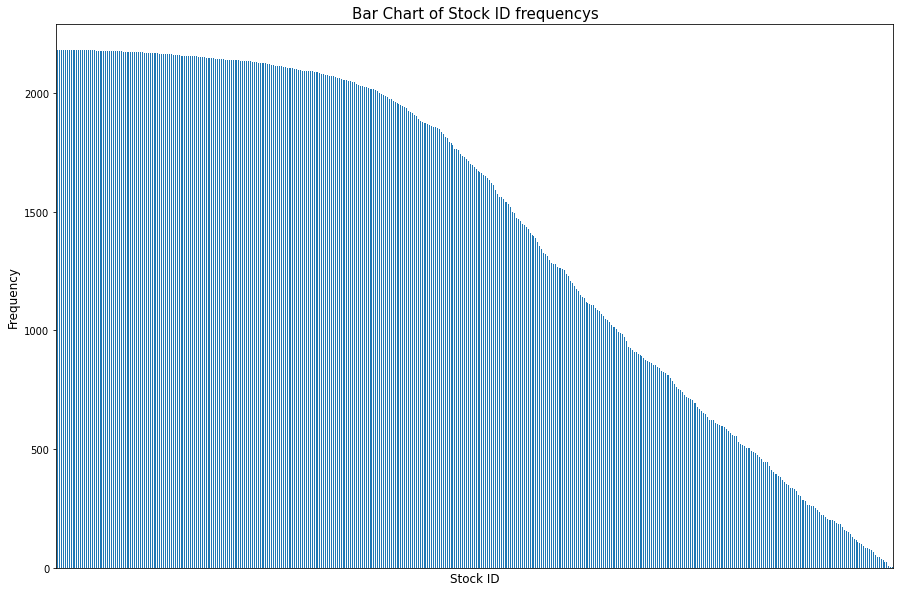

In [ ]:
plt.figure(figsize=(15, 10))
combo['stock_id'].value_counts().plot(kind='bar')
plt.xlabel('Stock ID',size=12)
plt.ylabel('Frequency',size=12)
plt.xticks([])
plt.title('Bar Chart of Stock ID frequencys' ,size=15)
plt.show()

Code below used for omitting stocks with limited data, in this case removed all stocks with less than 2000 data points.

In [ ]:
v = combo[['stock_id']]
combo_v2=combo[v.replace(v.stack().value_counts()).gt(2000).all(1)]

In [ ]:
#list of stock ids
unique_stock_ids=combo_v2.stock_id.unique()
unique_stock_ids

array(['stock_0', 'stock_58', 'stock_59', 'stock_62', 'stock_66',
       'stock_70', 'stock_72', 'stock_75', 'stock_78', 'stock_80',
       'stock_83', 'stock_87', 'stock_89', 'stock_93', 'stock_96',
       'stock_99', 'stock_104', 'stock_107', 'stock_108', 'stock_110',
       'stock_116', 'stock_117', 'stock_119', 'stock_122', 'stock_124',
       'stock_127', 'stock_131', 'stock_135', 'stock_136', 'stock_137',
       'stock_138', 'stock_141', 'stock_144', 'stock_148', 'stock_149',
       'stock_150', 'stock_152', 'stock_159', 'stock_160', 'stock_165',
       'stock_167', 'stock_168', 'stock_169', 'stock_171', 'stock_174',
       'stock_183', 'stock_186', 'stock_187', 'stock_188', 'stock_191',
       'stock_193', 'stock_197', 'stock_198', 'stock_200', 'stock_201',
       'stock_202', 'stock_203', 'stock_204', 'stock_206', 'stock_214',
       'stock_216', 'stock_218', 'stock_220', 'stock_221', 'stock_222',
       'stock_227', 'stock_234', 'stock_245', 'stock_246', 'stock_250',
       's

#### Volume feature

Could potentially standardize the log of the volume as it looks gaussian or could just normalise volume. Could probably do with removing outliers.

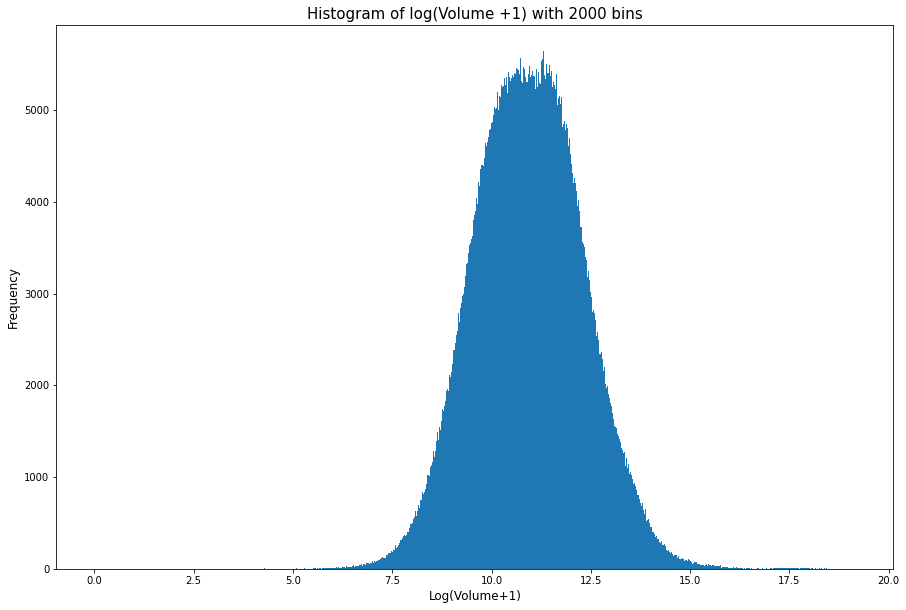

In [ ]:
plt.figure(figsize=(15, 10))
plt.np.log(features['volume']+1).plot.hist(bins=2000)
plt.xlabel('Log(Volume+1)',size=12)
plt.ylabel('Frequency',size=12)
plt.title('Histogram of log(Volume +1) with 2000 bins',size=15)
plt.show()

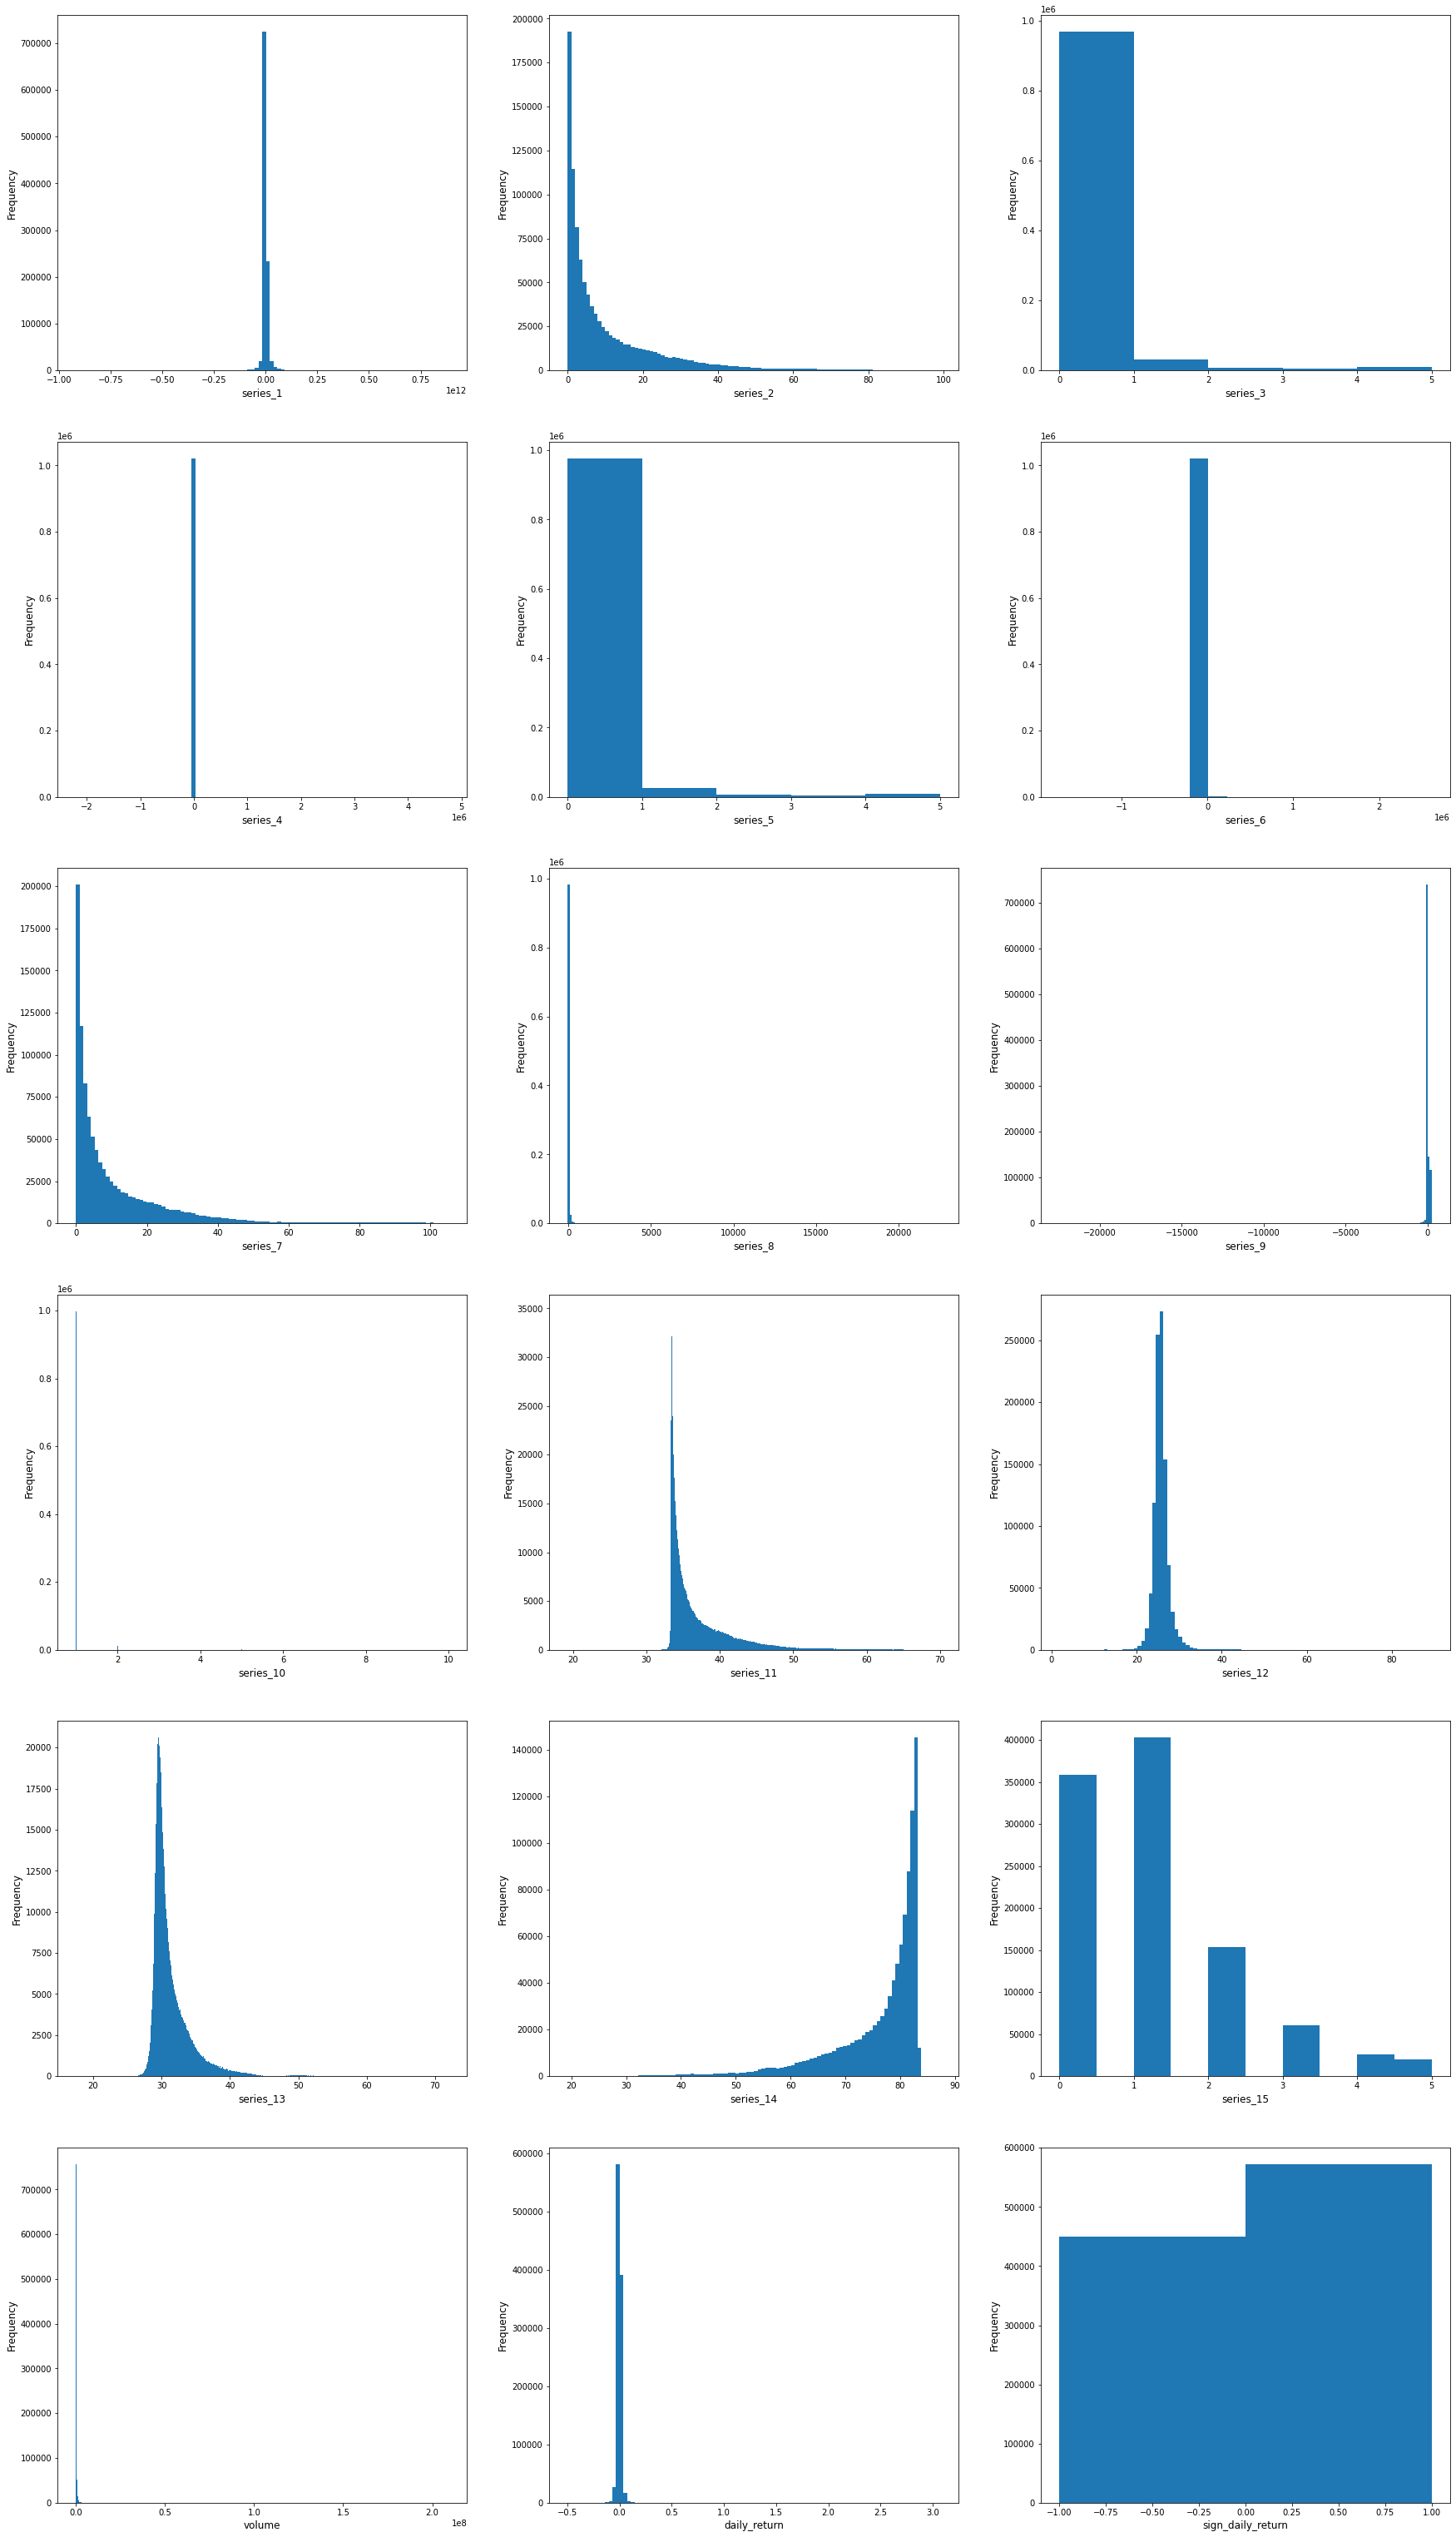

In [ ]:
plt.figure(figsize=(30, 55))
j=0
features_list=['series_1','series_2','series_3','series_4','series_5','series_6','series_7','series_8','series_9','series_10','series_11','series_12','series_13','series_14','series_15','volume','daily_return','sign_daily_return']
bins_list=[100,100,5,100,5,20,100,200,200,1000,1000,100,1000,100,10,1000,100,2]
for i in range(len(features_list)):
  plt.subplot(6, 3, j+1)
  #plt.plot(x1, y1, 'o-')
  combo_v2[features_list[j]].plot.hist(bins=bins_list[j])
  plt.xlabel('{}'.format(features_list[j]),size=12)
  plt.ylabel('Frequency',size=12)
  #plt.xticks([])
  j+=1


plt.show()

#### Exploration of data

##### all dates

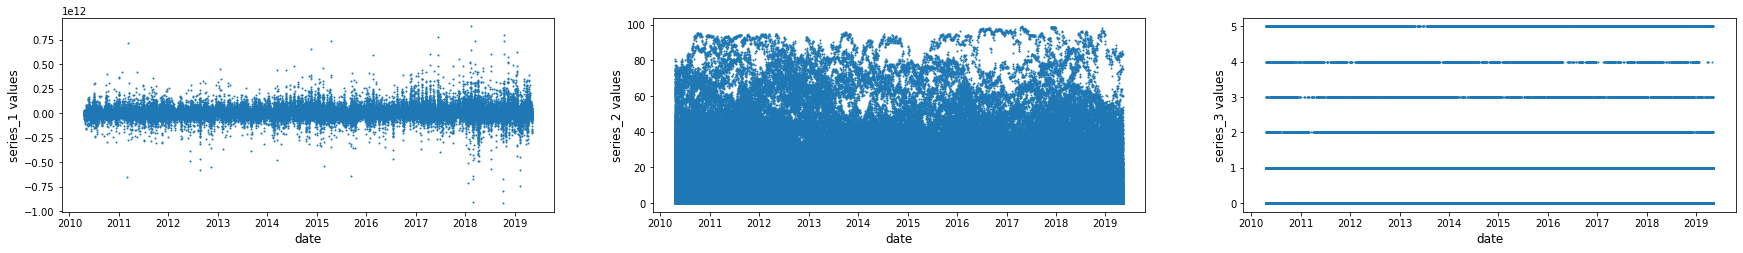

In [ ]:
plt.figure(figsize=(30, 25))
j=0
features_list=['series_1','series_2','series_3','series_4','series_5','series_6','series_7','series_8','series_9','series_10','series_11','series_12','series_13','series_14','series_15','volume','daily_return','sign_daily_return']

#iterate for number of subplots
for i in range(3):
  plt.subplot(6, 3, j+1)
  plt.plot_date(combo_v2['date'],combo_v2[features_list[j]],xdate=True,ms=1)
  #plt.xticks([])
  plt.xlabel('date',size=12)
  plt.ylabel('{} values'.format(features_list[j]),size=12)
  j+=1


plt.show()

Too much data on graphs above to make any conclusions. 

The code below restricts to 5 randopmly chosen stocks. Nothing of too much note, some look like times series data.

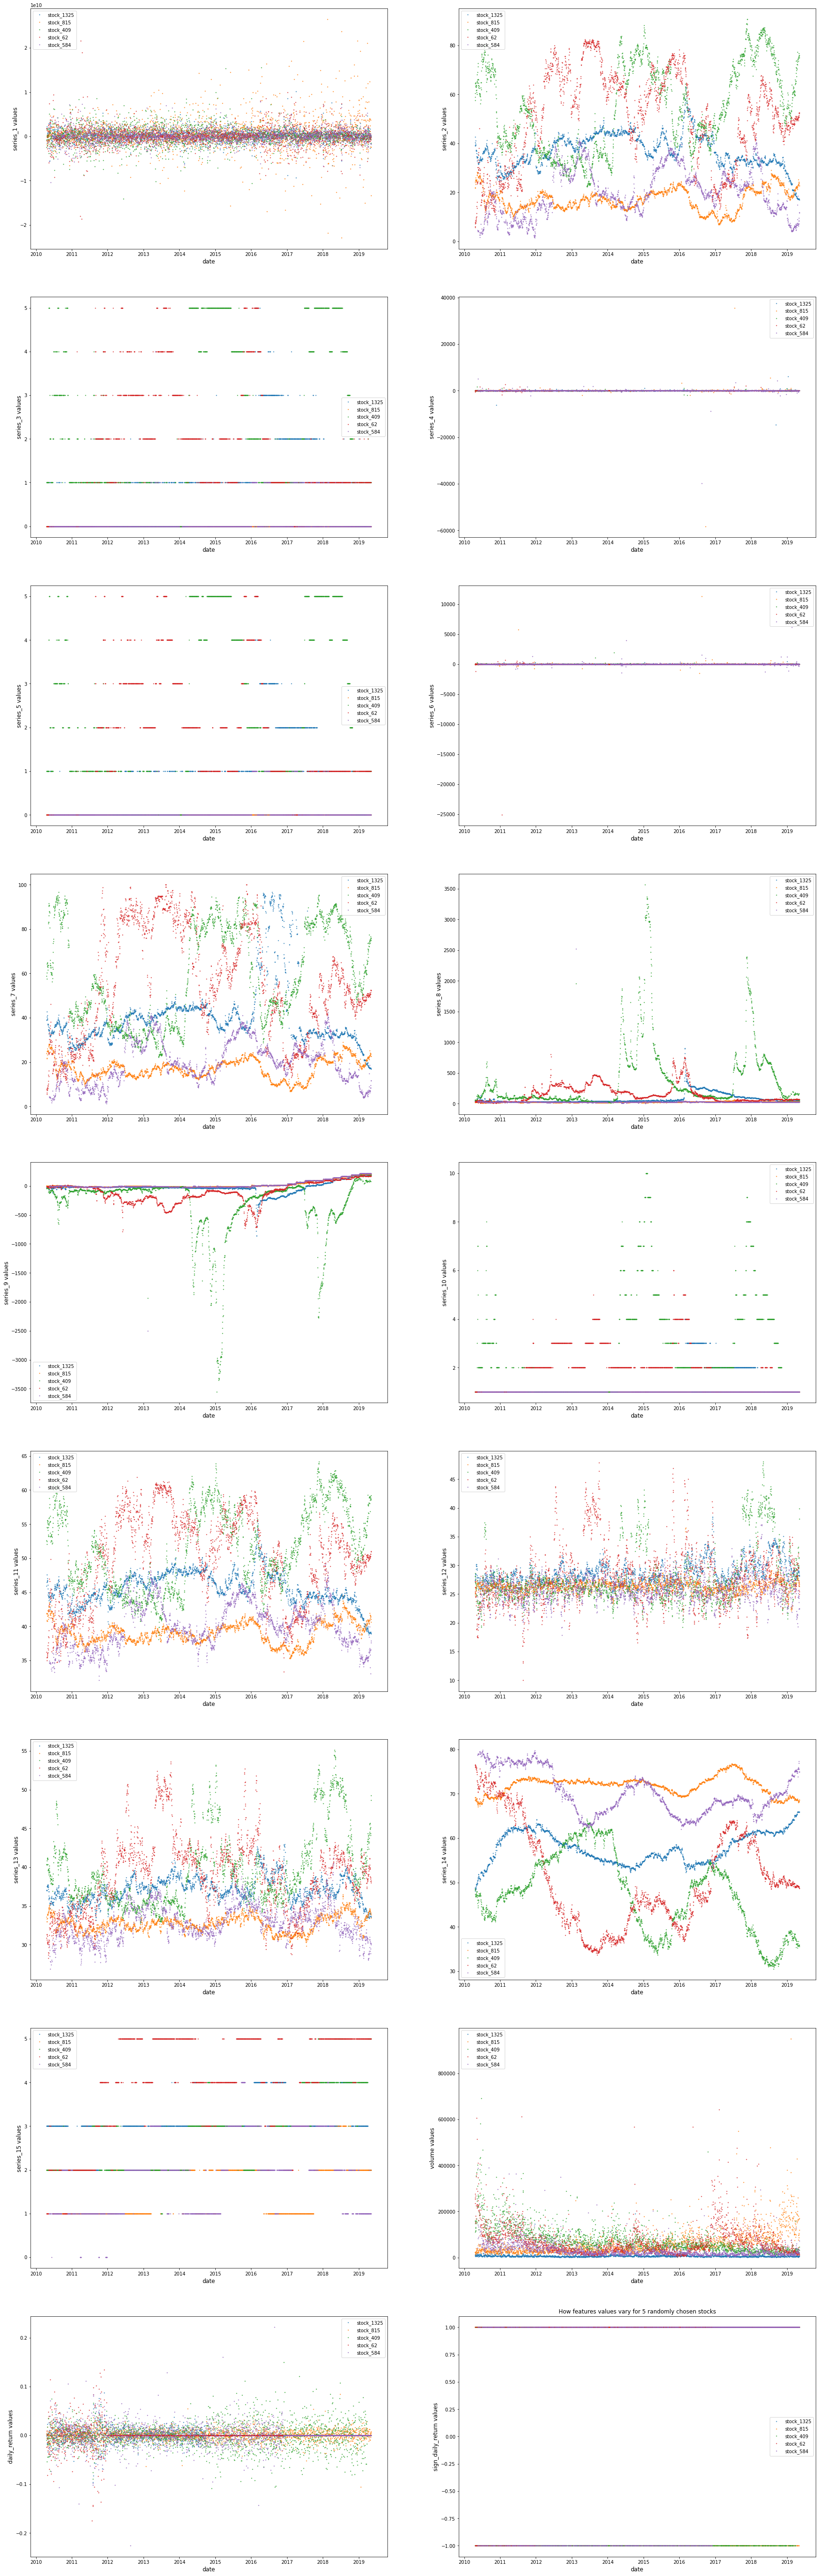

In [ ]:
#restrict data to 5 stocks: stock_1325,stock_815,stock_409,stock_62','stock_584'
plt.figure(figsize=(30, 100))
j=0

stock_list=['stock_1325','stock_815','stock_409','stock_62','stock_584']
features_list=['series_1','series_2','series_3','series_4','series_5','series_6','series_7','series_8','series_9','series_10','series_11','series_12','series_13','series_14','series_15','volume','daily_return','sign_daily_return']

#iterate for number of subplots
for i in range(18):
  plt.subplot(9, 2, j+1)
  for k in stock_list:
    df=combo_v2[combo_v2['stock_id']==k]
    plt.plot_date(df['date'],df[features_list[j]],xdate=True,ms=1)
  plt.xlabel('date',size=12)
  plt.ylabel('{} values'.format(features_list[j]),size=12)
  
  plt.legend(stock_list)
  j+=1

plt.title('How features values vary for 5 randomly chosen stocks')
plt.show()

##### random month of dates

Nothing of much note, when restricted to a months worth of data.

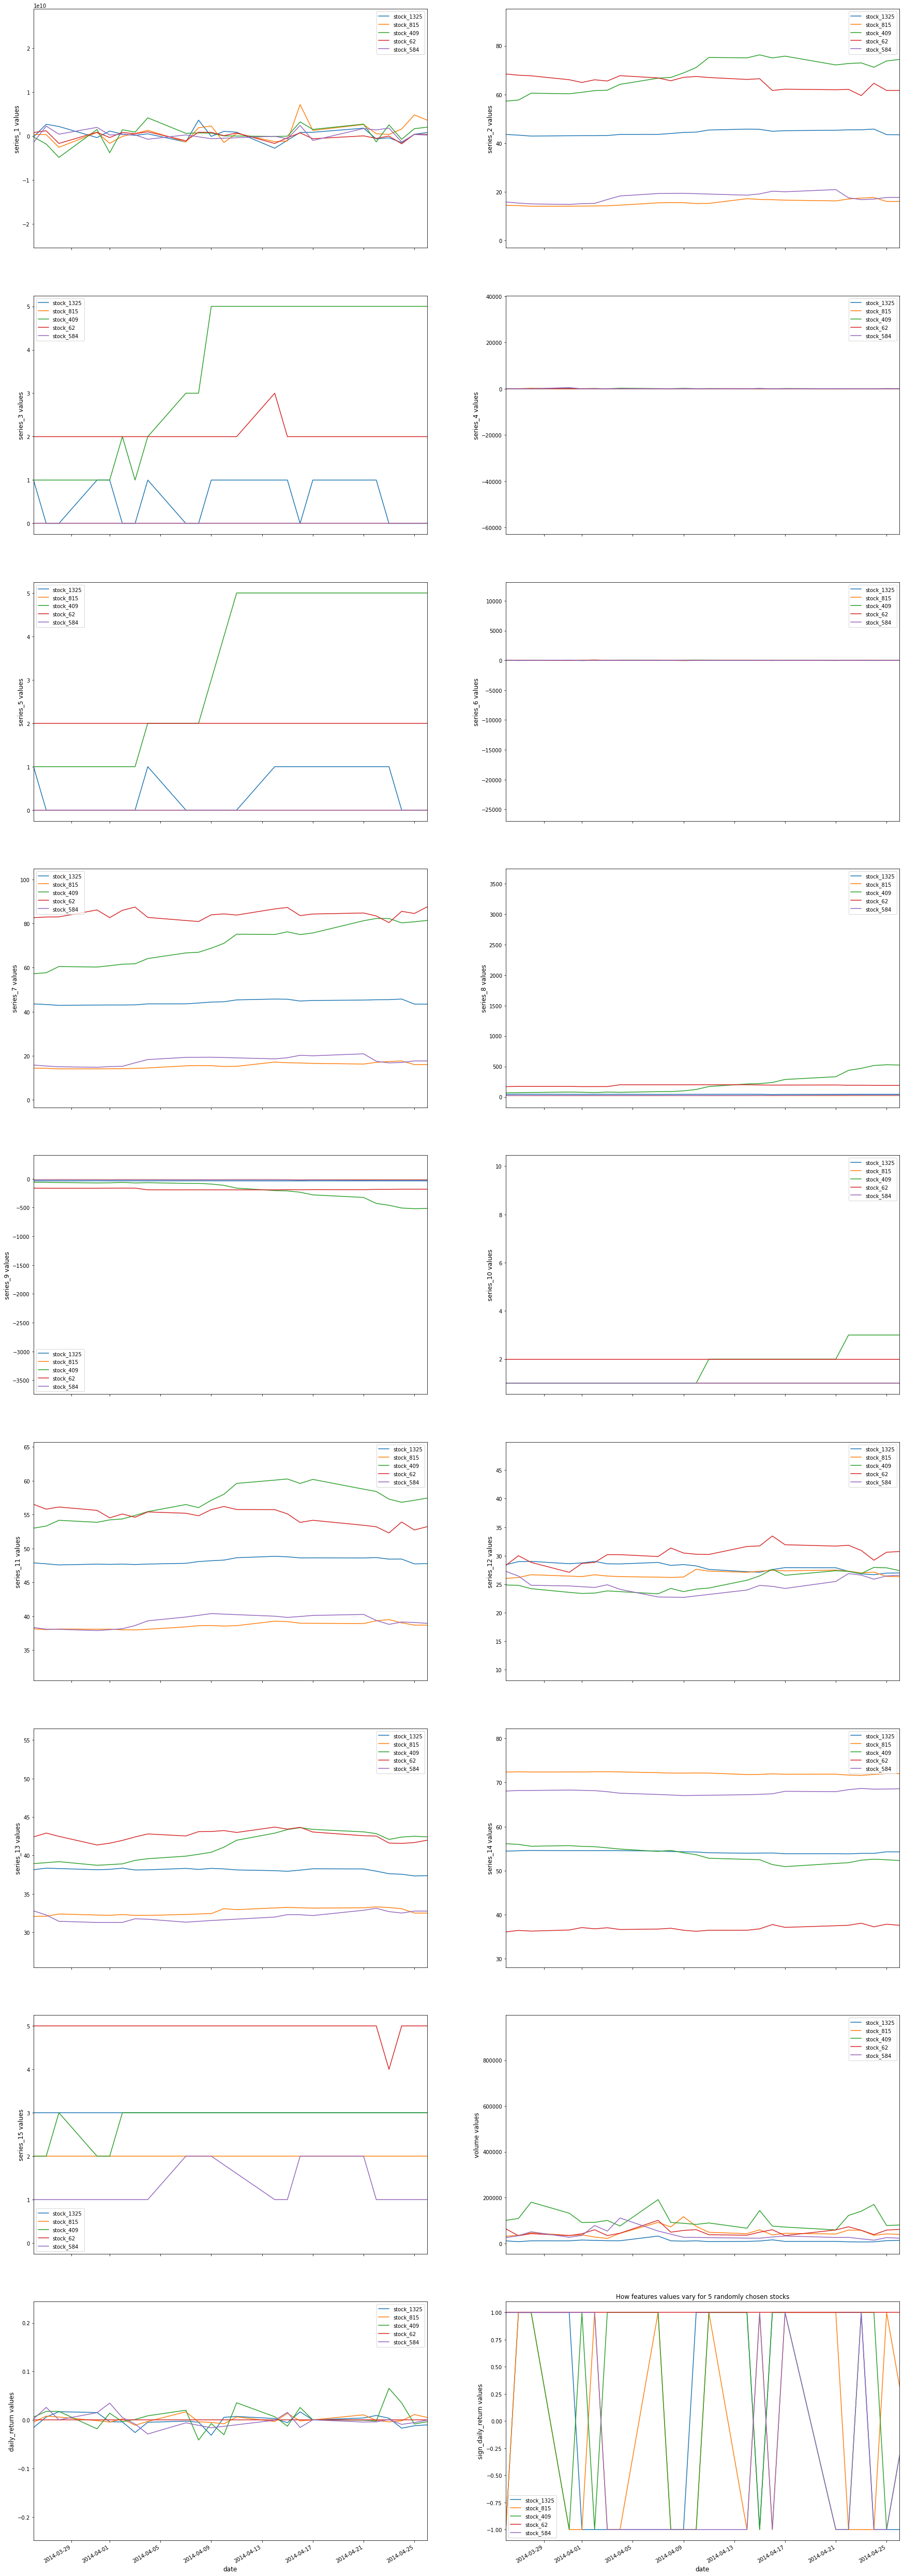

In [ ]:
#restrict data to 5 stocks: stock_1325,stock_815,stock_409,stock_62','stock_584'
plt.figure(figsize=(30, 100))
j=0

stock_list=['stock_1325','stock_815','stock_409','stock_62','stock_584']
features_list=['series_1','series_2','series_3','series_4','series_5','series_6','series_7','series_8','series_9','series_10','series_11','series_12','series_13','series_14','series_15','volume','daily_return','sign_daily_return']

#iterate for number of subplots
for i in range(18):
  plt.subplot(9, 2, j+1)
  for k in stock_list:
    df=combo_v2[combo_v2['stock_id']==k]
    plt.plot(df['date'],df[features_list[j]])
    # beautify the x-labels
    plt.gcf().autofmt_xdate()
  #  plt.plot_date(df['date'],df[features_list[j]],xdate=True,ms=1)
    plt.xlim([datetime.date(2014, 3, 26), datetime.date(2014, 4, 26)])
  plt.xlabel('date',size=12)
  plt.ylabel('{} values'.format(features_list[j]),size=12)
  
  plt.legend(stock_list)
  j+=1

plt.title('How features values vary for 5 randomly chosen stocks')
plt.show()

##### 2 weeks of dates

Standardise the Data so it can be viewed on the same scaled graph. Could use robust scalar if heavily effected by outliers.

In [ ]:

scaler = StandardScaler()
X=['series_1','series_2','series_3','series_4','series_5','series_6','series_7','series_8','series_9','series_10','series_11','series_12','series_13','series_14','series_15','volume','daily_return']
combo_v3=combo_v2.copy()
combo_v3[X] = scaler.fit_transform(combo_v2[X]) 


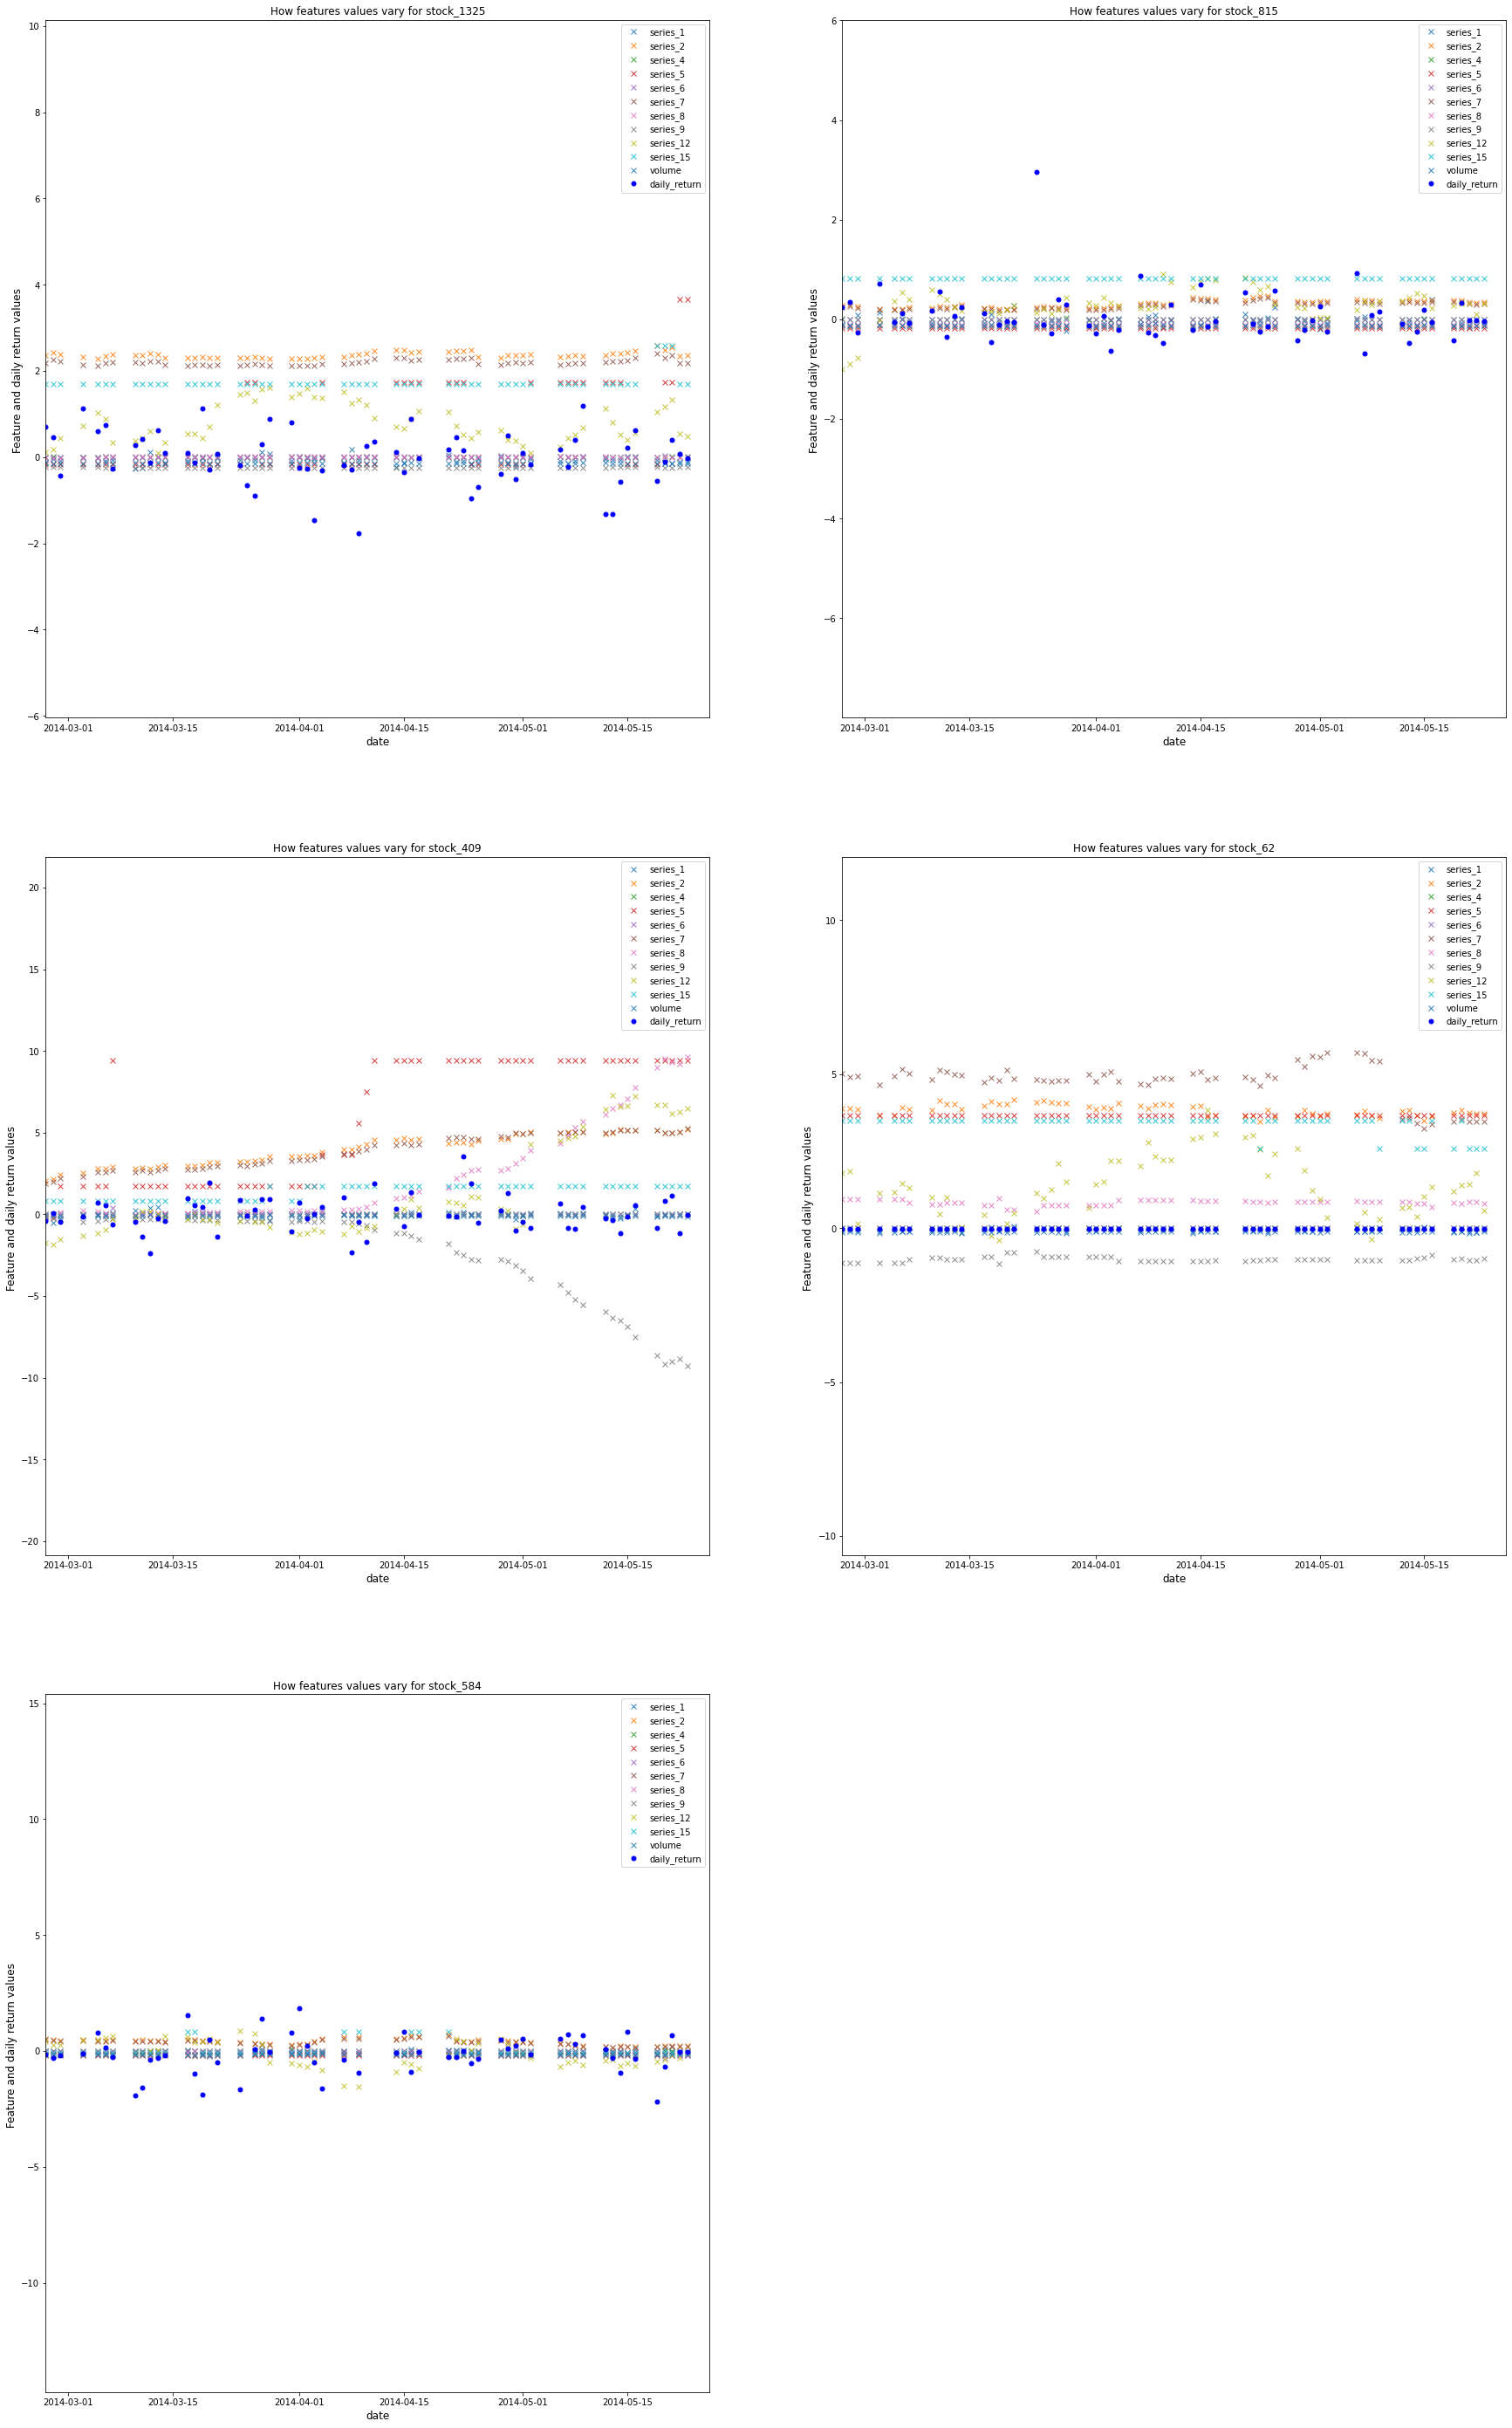

In [ ]:
#restrict data to 5 stocks: stock_1325,stock_815,stock_409,stock_62','stock_584'
plt.figure(figsize=(30, 50))
j=0


stock_list=['stock_1325','stock_815','stock_409','stock_62','stock_584']
#features_list=['series_1','series_2','series_3','series_4','series_5','series_6','series_7','series_8','series_9','series_10','series_11','series_12','series_13','series_14','series_15','volume','daily_return','sign_daily_return']
features_list=['series_1','series_2','series_4','series_5','series_6','series_7','series_8','series_9','series_12','series_15','volume','daily_return']
#iterate for number of subplots
for i in range(5):
  plt.subplot(3, 2, j+1)
  for k in features_list:
    df=combo_v3[combo_v3['stock_id']==stock_list[j]]
   # plt.plot(df['date'],df[k])
    # beautify the x-labels
    #plt.gcf().autofmt_xdate()
    if k=='daily_return':
      plt.plot_date(df['date'],df[k],xdate=True,ms=5,c='b')
    else:
      plt.plot_date(df['date'],df[k],xdate=True,ms=6,marker="x",alpha=0.9)
    plt.xlim([datetime.date(2014, 2, 26), datetime.date(2014, 5, 26)])
  plt.xlabel('date',size=12)
  plt.ylabel('Feature and daily return values ',size=12)
  plt.title('How features values vary for {}'.format(stock_list[j]))
  plt.legend(features_list)
  j+=1

plt.show()

Stock 409 features appear to have trend, not ideal for designing a model, would need to be cleaned. Does not appear ot be any clear trends.

### Multicollinearity

#### Multicollinearity of Features all

In [ ]:
series_data=combo_v2[['series_1','series_2','series_3','series_4','series_5','series_6','series_7','series_8','series_9','series_10','series_11','series_12','series_13','series_14','series_15','volume','daily_return','sign_daily_return','sp_percentage_ch']]
#correlation matrices using different metrics
corr_pear_data=series_data.corr(method='pearson')
corr_spear_data=series_data.corr(method='spearman')
corr_ken_data=series_data.corr(method='kendall')


#####  Pearson Heatmap

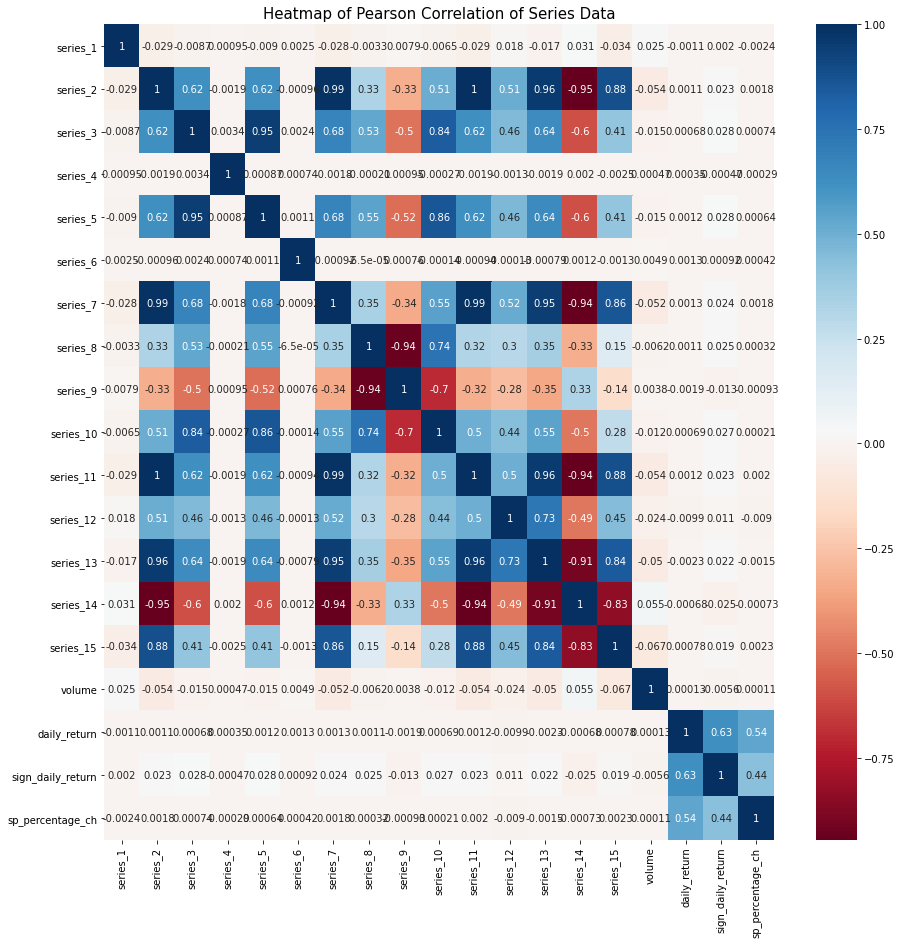

In [ ]:
# plot the heatmap
%matplotlib inline

plt.figure(figsize=(15, 15))
plt.title('Heatmap of Pearson Correlation of Series Data',size=15)
sns.heatmap(corr_pear_data, 
        xticklabels=corr_pear_data.columns,
        yticklabels=corr_pear_data.columns,annot=True,cmap="RdBu")
plt.show()

Reassuringly None are directly correlated to daily return.

1,4,6 very independent

10,12 fairly corrleated to  various other variable

[3,5] -highly correlated to each other

[8,9] -highly correlated to each other

[2,7,11,13,14,15] -highly correlated to each other





##### Spearman Heatmap

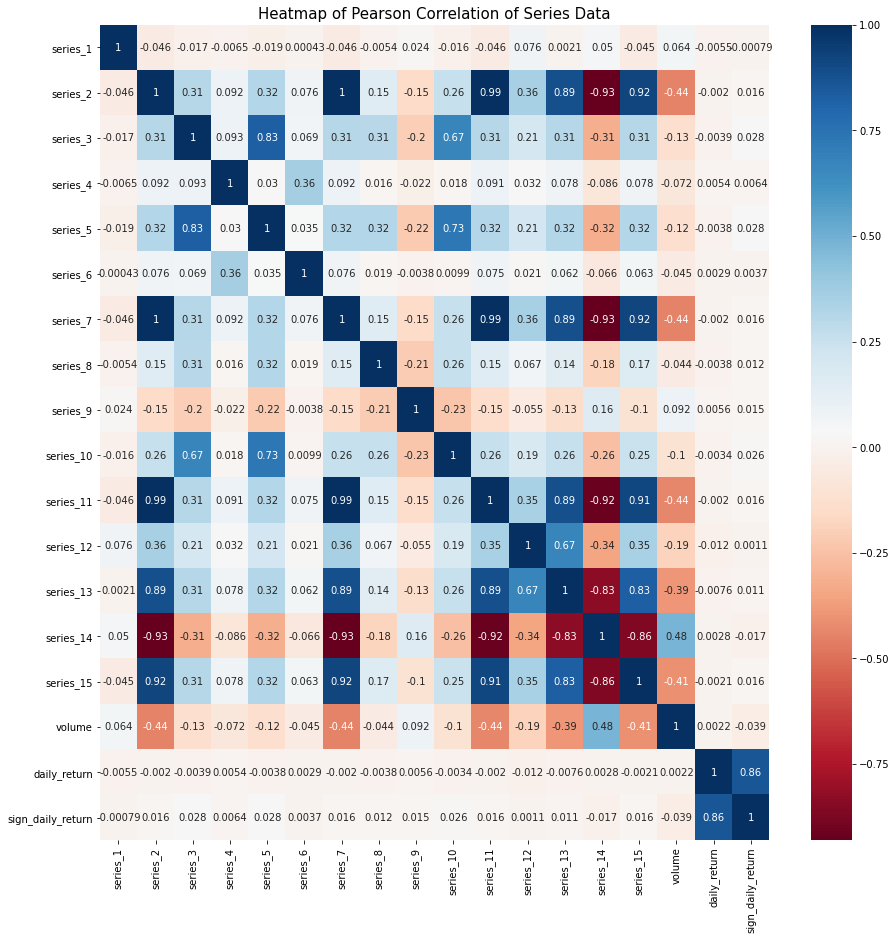

In [ ]:
# plot the heatmap

plt.figure(figsize=(15, 15))
plt.title('Heatmap of Pearson Correlation of Series Data',size=15)
sns.heatmap(corr_spear_data, 
        xticklabels=corr_spear_data.columns,
        yticklabels=corr_spear_data.columns,annot=True,cmap="RdBu")
plt.show()

Nothing of real note not explained by pearson.

##### Kendal Heatmap

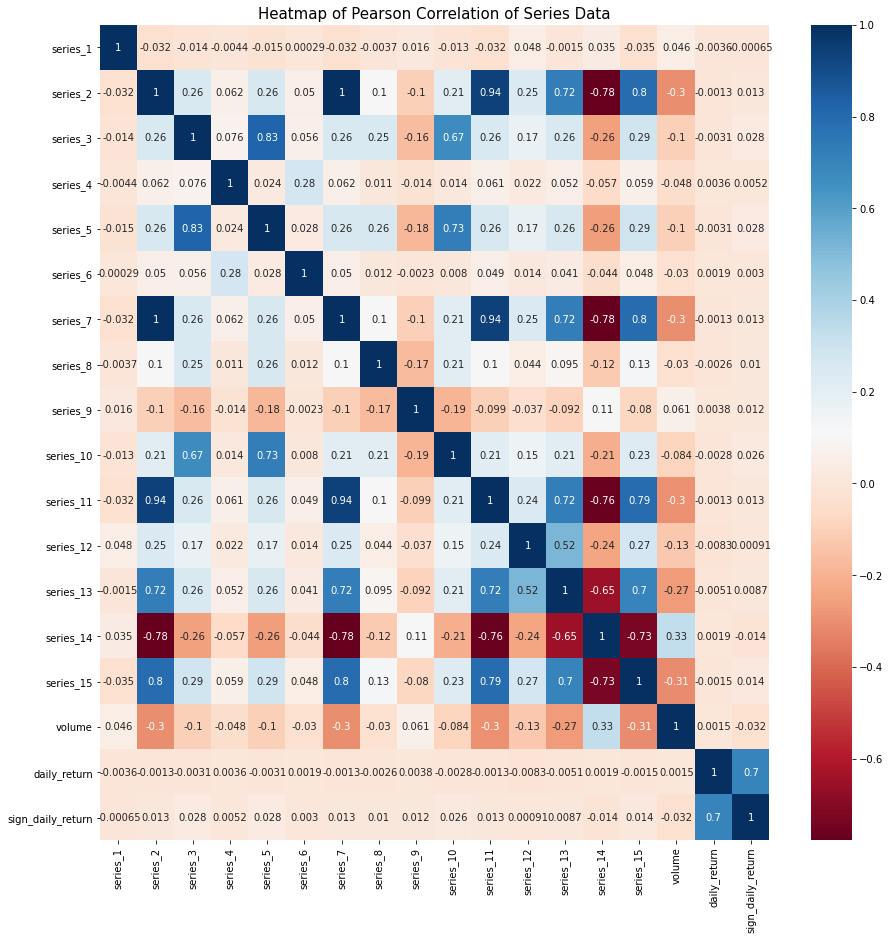

In [ ]:
# plot the heatmap

plt.figure(figsize=(15, 15))
plt.title('Heatmap of Pearson Correlation of Series Data',size=15)
sns.heatmap(corr_ken_data, 
        xticklabels=corr_ken_data.columns,
        yticklabels=corr_ken_data.columns,annot=True,cmap="RdBu")
plt.show()

Shows how concordant or discordant the data, nothing of real note. 

#### Multicollinearity of Features Stock 1325

In [ ]:
df_stock_1325=combo_v2[combo_v2['stock_id']=='stock_1325']
series_data=df_stock_1325[['series_1','series_2','series_3','series_4','series_5','series_6','series_7','series_8','series_9','series_10','series_11','series_12','series_13','series_14','series_15','volume','daily_return','sign_daily_return','sp_percentage_ch']]
corr_pear_data=series_data.corr(method='pearson')
corr_spear_data=series_data.corr(method='spearman')
corr_ken_data=series_data.corr(method='kendall')



#####  Pearson Heatmap

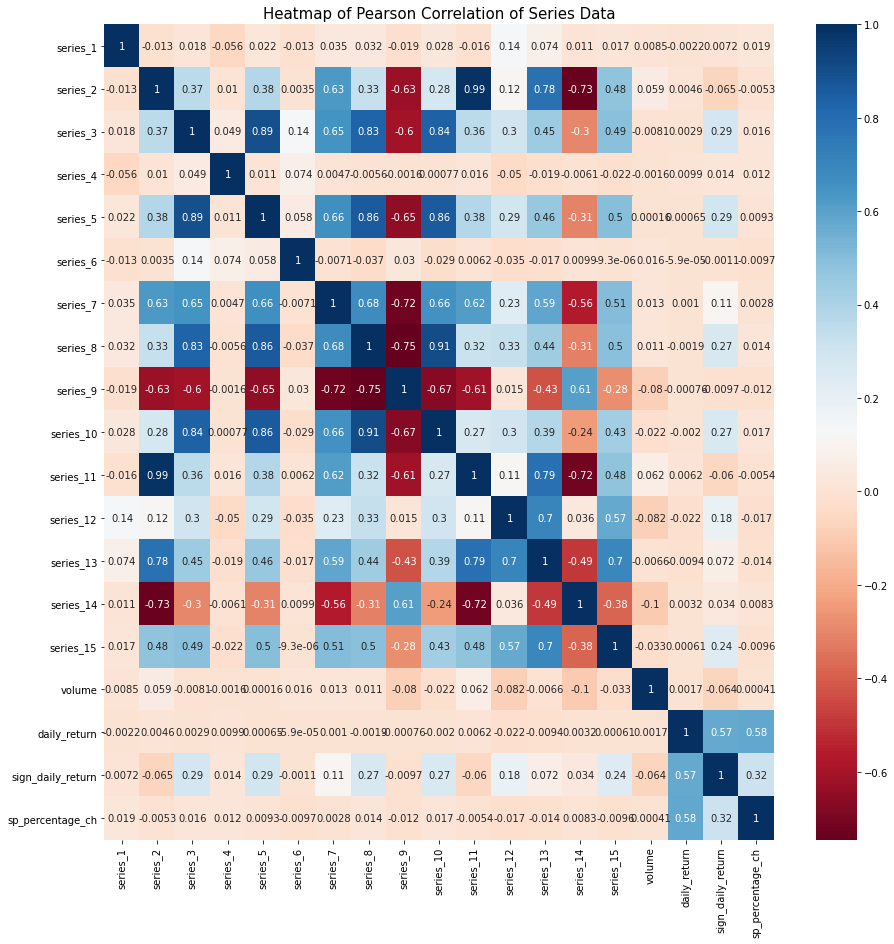

In [ ]:
# plot the heatmap
%matplotlib inline

plt.figure(figsize=(15, 15))
plt.title('Heatmap of Pearson Correlation of Series Data',size=15)
sns.heatmap(corr_pear_data, 
        xticklabels=corr_pear_data.columns,
        yticklabels=corr_pear_data.columns,annot=True,cmap="RdBu")
plt.show()

Reassuringly None are directly correlated to daily return.

1,4,6 very independent

10,12 fairly corrleated to  various other variable

[3,5] -highly correlated to each other

[8,9] -highly correlated to each other

[2,7,11,13,14,15] -highly correlated to each other

will drop 11



##### Spearman Heatmap

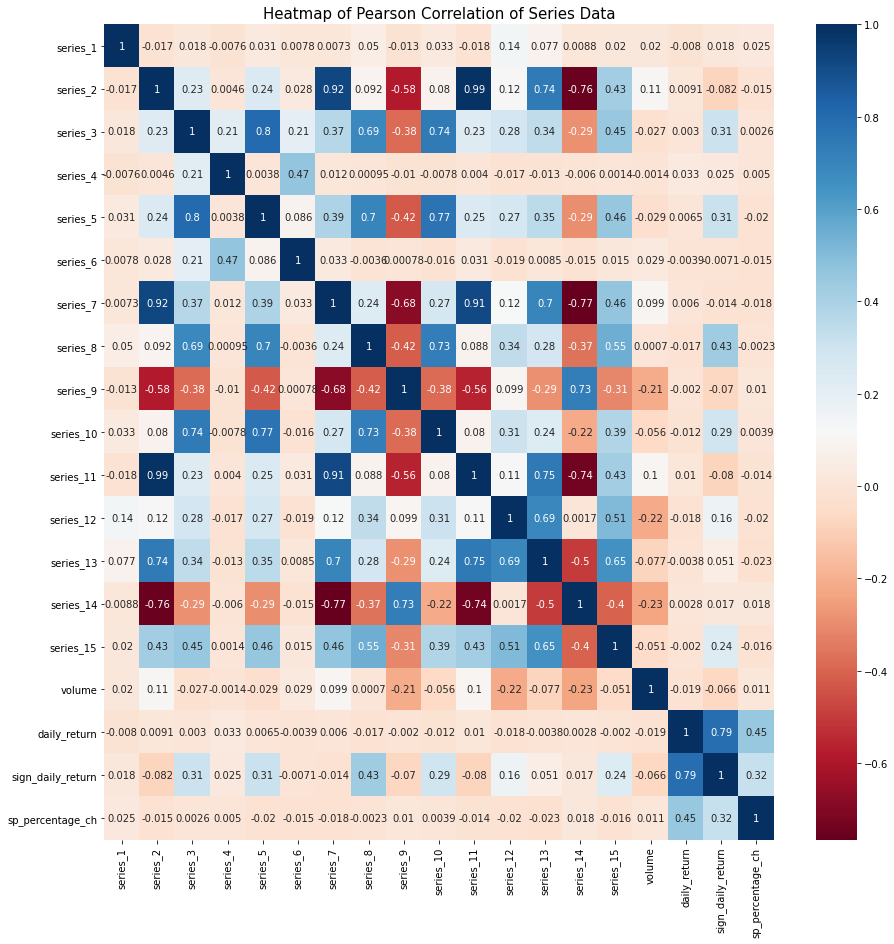

In [ ]:
# plot the heatmap

plt.figure(figsize=(15, 15))
plt.title('Heatmap of Pearson Correlation of Series Data',size=15)
sns.heatmap(corr_spear_data, 
        xticklabels=corr_spear_data.columns,
        yticklabels=corr_spear_data.columns,annot=True,cmap="RdBu")
plt.show()

Nothing of real note not explained by pearson.

##### Kendal Heatmap

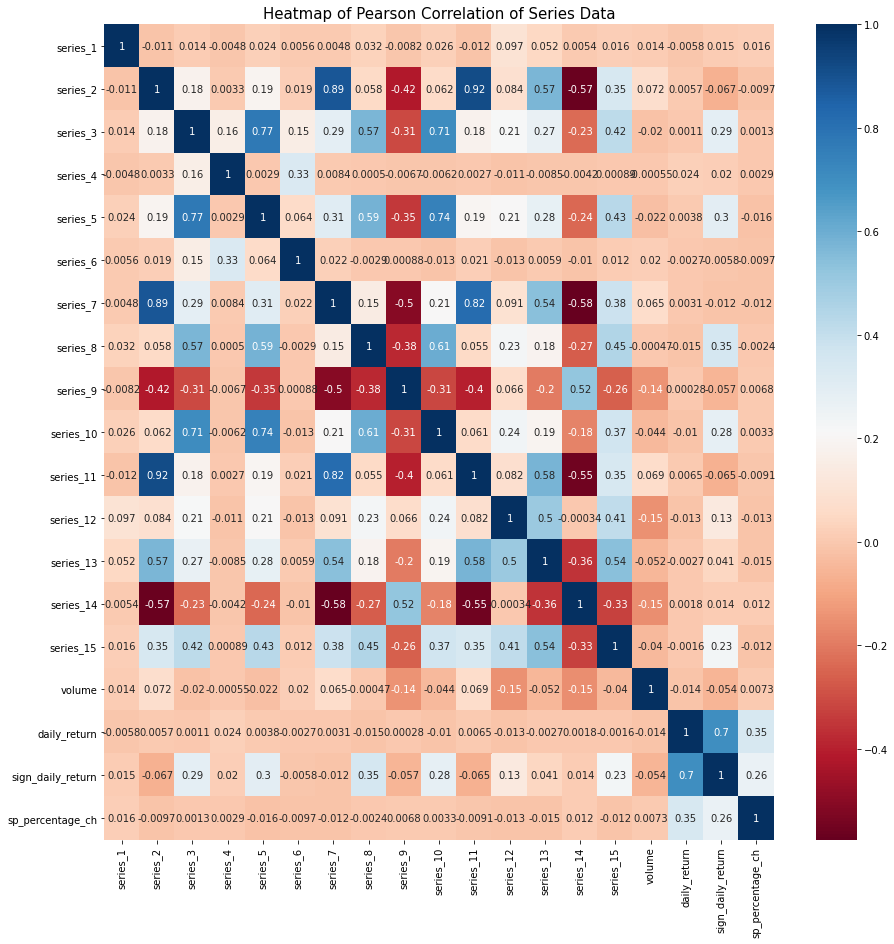

In [ ]:
# plot the heatmap

plt.figure(figsize=(15, 15))
plt.title('Heatmap of Pearson Correlation of Series Data',size=15)
sns.heatmap(corr_ken_data, 
        xticklabels=corr_ken_data.columns,
        yticklabels=corr_ken_data.columns,annot=True,cmap="RdBu")
plt.show()

Shows how concordant or discordant the data, nothing of real note. 

#### Multicollinearity of Features average 5 Stocks

In [ ]:
df_stock_1325=combo_v2[combo_v2['stock_id']=='stock_1325']
series_data=df_stock_1325[['series_1','series_2','series_3','series_4','series_5','series_6','series_7','series_8','series_9','series_10','series_11','series_12','series_13','series_14','series_15','volume','daily_return','sign_daily_return']]
stock_list=['stock_815','stock_409','stock_62','stock_584']
corr_pear_data=series_data.corr(method='pearson')
corr_spear_data=series_data.corr(method='spearman')
corr_ken_data=series_data.corr(method='kendall')
j=1
for i in stock_list:
  df_stock_1325=combo_v2[combo_v2['stock_id']==i]
  #correlation matrices using different metrics
  series_data=df_stock_1325[['series_1','series_2','series_3','series_4','series_5','series_6','series_7','series_8','series_9','series_10','series_11','series_12','series_13','series_14','series_15','volume','daily_return','sign_daily_return']]
  corr_pear_data+=series_data.corr(method='pearson')
  corr_spear_data+=series_data.corr(method='spearman')
  corr_ken_data+=series_data.corr(method='kendall')
  j+=1

corr_pear_data=corr_pear_data/j
corr_spear_data=corr_spear_data/j
corr_ken_data=corr_ken_data/j


#####  Pearson Heatmap

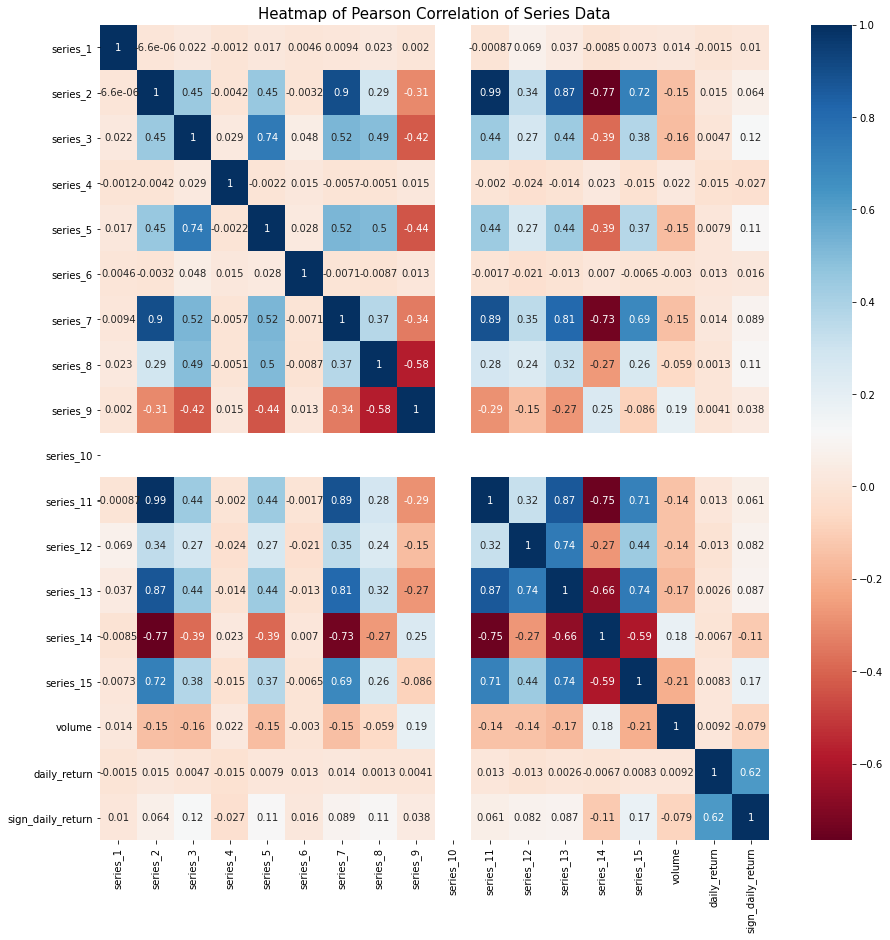

In [ ]:
# plot the heatmap
%matplotlib inline

plt.figure(figsize=(15, 15))
plt.title('Heatmap of Pearson Correlation of Series Data',size=15)
sns.heatmap(corr_pear_data, 
        xticklabels=corr_pear_data.columns,
        yticklabels=corr_pear_data.columns,annot=True,cmap="RdBu")
plt.show()

Reassuringly None are directly correlated to daily return.

Interestingly serires 10 is empty.

1,4,6 very independent

10 fairly corrleated to  various other variable

[3,5] -highly correlated to each other

[8,9] -highly correlated to each other

[2,7,11,13,14,15] -highly correlated to each other





##### Spearman Heatmap

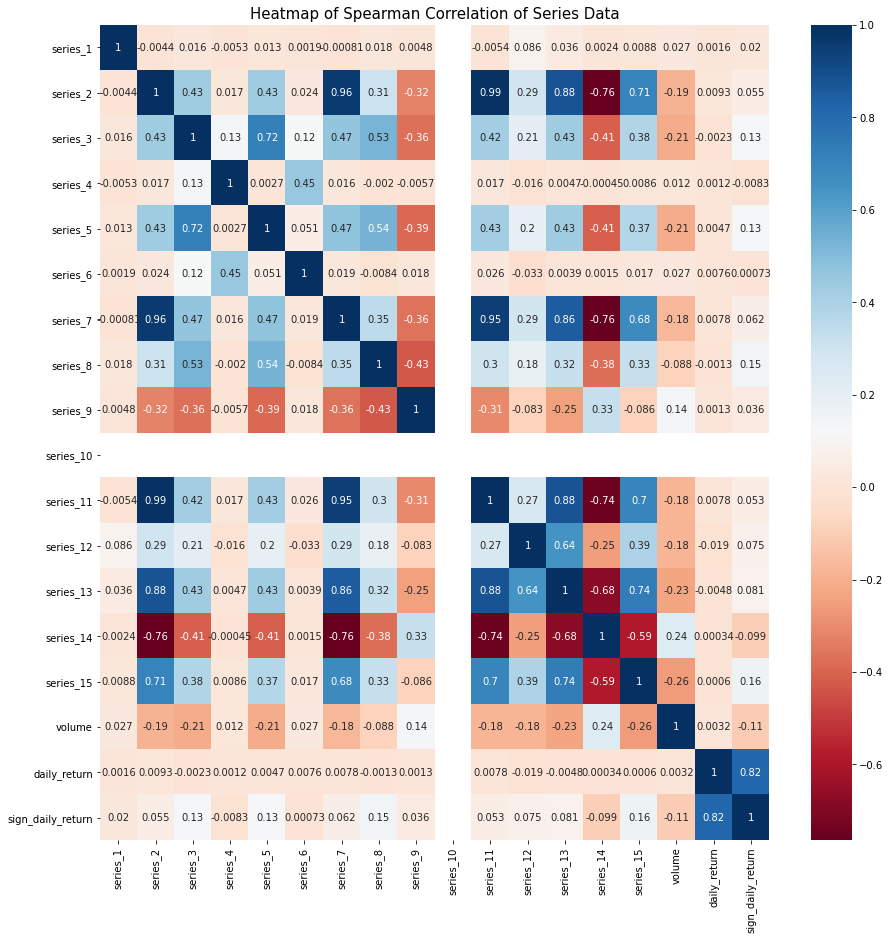

In [ ]:
# plot the heatmap

plt.figure(figsize=(15, 15))
plt.title('Heatmap of Spearman Correlation of Series Data',size=15)
sns.heatmap(corr_spear_data, 
        xticklabels=corr_spear_data.columns,
        yticklabels=corr_spear_data.columns,annot=True,cmap="RdBu")
plt.show()

Nothing of real note not explained by pearson.

##### Kendal Heatmap

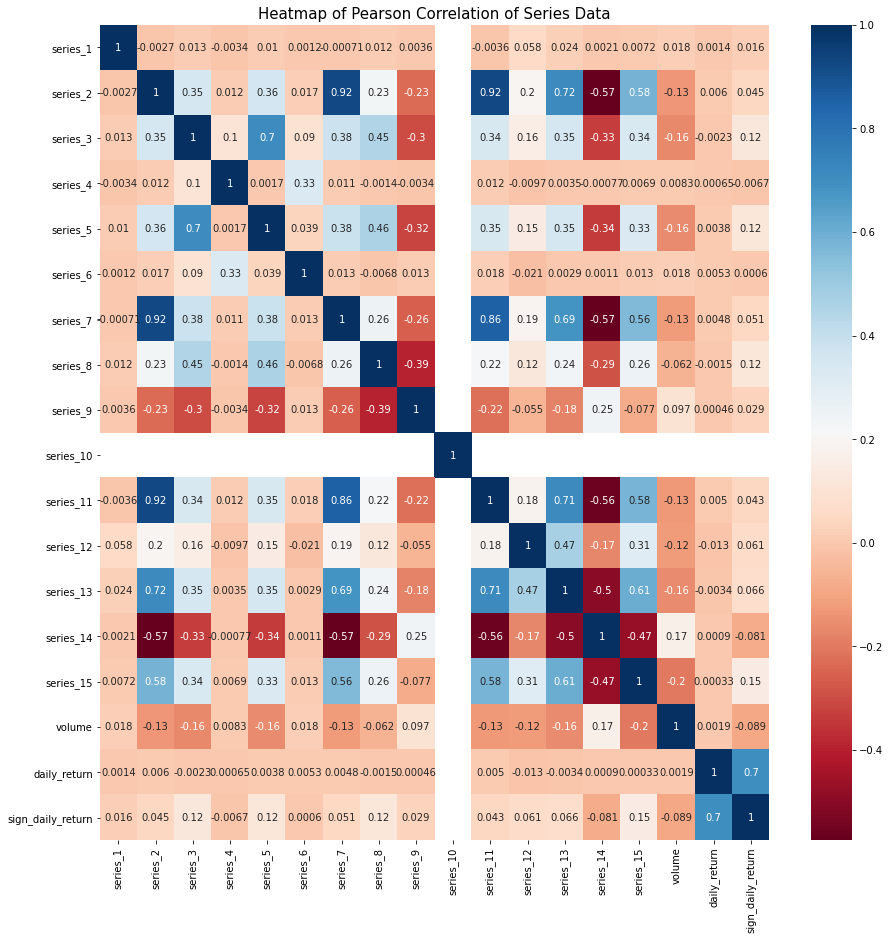

In [ ]:
# plot the heatmap

plt.figure(figsize=(15, 15))
plt.title('Heatmap of Pearson Correlation of Series Data',size=15)
sns.heatmap(corr_ken_data, 
        xticklabels=corr_ken_data.columns,
        yticklabels=corr_ken_data.columns,annot=True,cmap="RdBu")
plt.show()

Shows how concordant or discordant the data, nothing of real note. 

Shows how concordant or discordant the data, nothing of real note. 

### PCA

Will compare series 1,4,6,10,12,3,8,2. Shows how none are really colinear apart from maybe 10 and 8. 

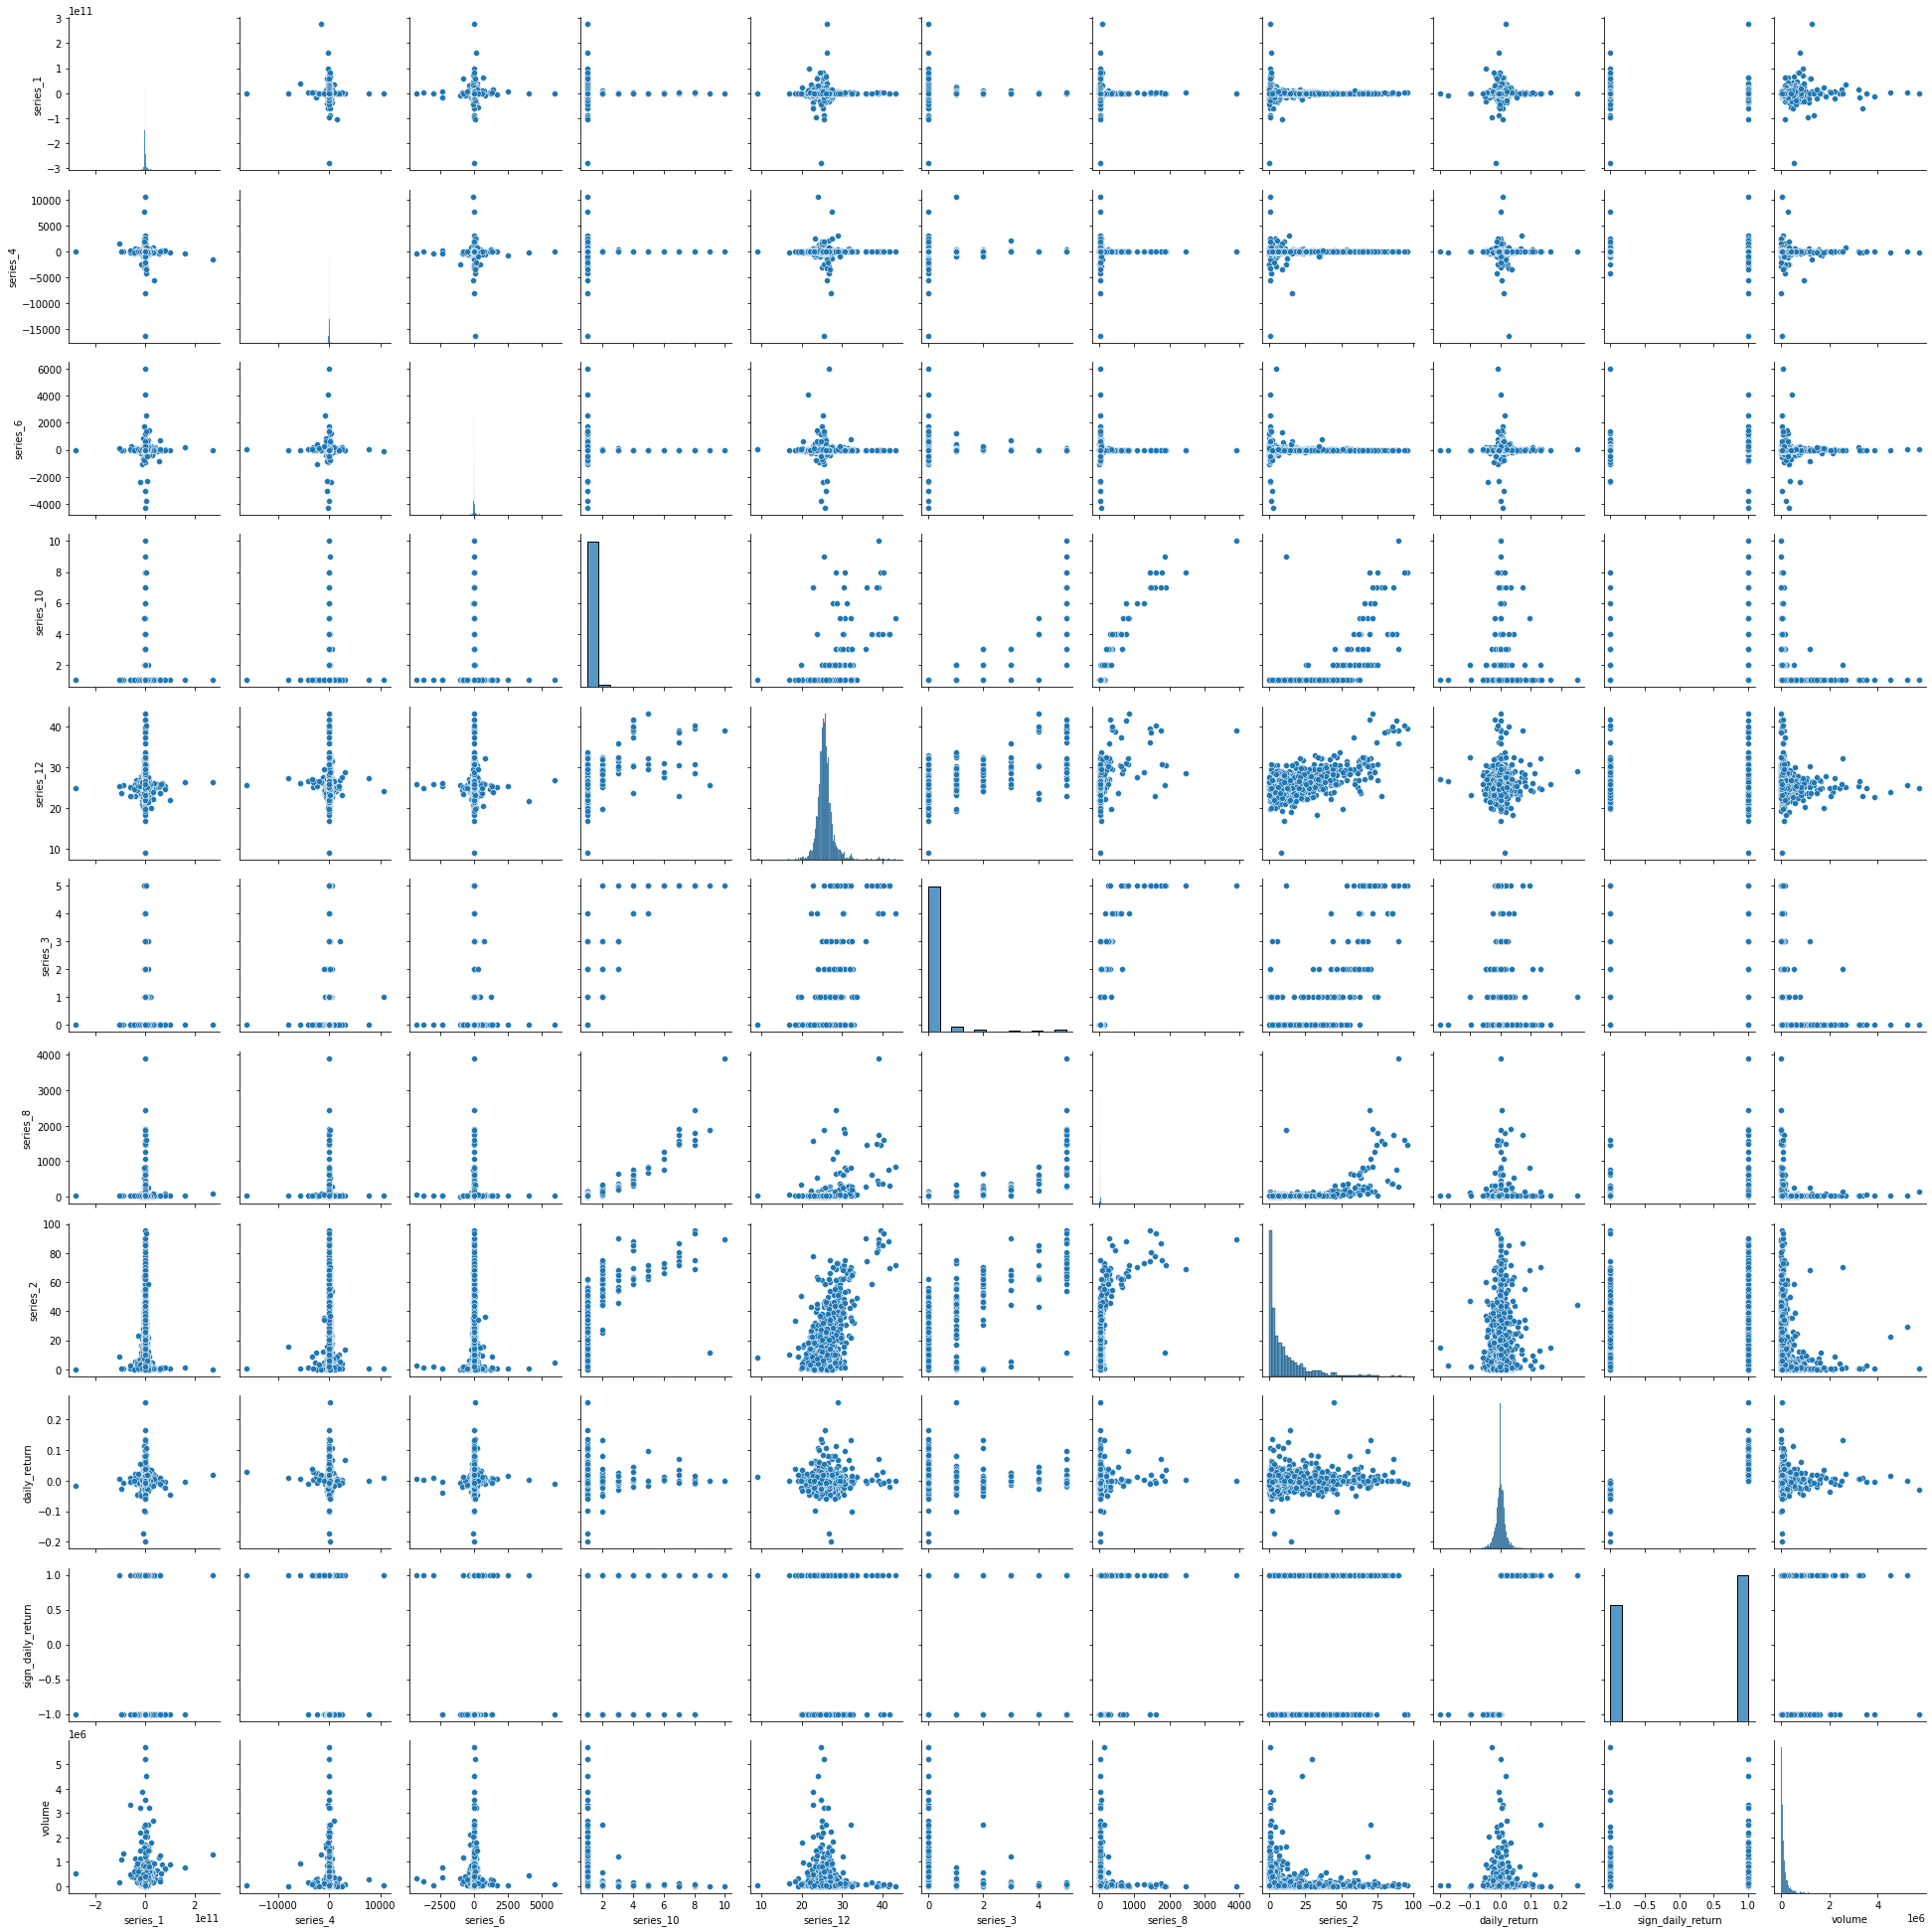

In [ ]:
Restricted_data=combo[['series_1','series_4','series_6','series_10','series_12','series_3','series_8','series_2','daily_return','sign_daily_return','volume']].sample(2000)
sns.pairplot(Restricted_data)


In [ ]:
train_data=combo[['series_1','series_2','series_3','series_4','series_5','series_6','series_7','series_8','series_9','series_10','series_11','series_12','series_13','series_14','series_15','volume']]
scaler = StandardScaler()
scaler.fit(train_data)
stand_features = scaler.transform(train_data)

In [ ]:
pca = PCA()
pca.fit(stand_features)
ttt = pca.transform(stand_features)

Below is the explained variance surprising large. Was expecting far more data points to be reduced.

In [ ]:
pca.explained_variance_

array([7.75023680e+00, 2.20145635e+00, 1.02861982e+00, 1.00203358e+00,
       9.97569463e-01, 9.72672714e-01, 7.94157818e-01, 7.57754868e-01,
       1.53086316e-01, 1.31908526e-01, 9.13185210e-02, 5.60137123e-02,
       4.56563877e-02, 1.43477251e-02, 3.17649428e-03, 8.05522876e-11])

### Ridge

Standardise the data and select columns which are independent drop reatled columns. 

In [ ]:
scaler = StandardScaler()
X_col=['series_1','series_2','series_3','series_4','series_5','series_6','series_7','series_8','series_9','series_10','series_11','series_12','series_13','series_14','series_15','volume','daily_return']
X_col_red=['series_1','series_3','series_4','series_6','series_7','series_9','series_10','series_12','volume','daily_return']
combo_v3=combo_v2.copy()
combo_v3[X_col] = scaler.fit_transform(combo_v2[X_col]) 


combo_v3_red=combo_v2.copy()
combo_v3_red[X_col_red] = scaler.fit_transform(combo_v2[X_col_red])
for i in X_col:
  if i not in X_col_red:
    combo_v3_red.drop(columns=i)

Create function to extract dates.

In [ ]:
def dateex(df,start_date = '03-01-1996',end_date = '06-01-2014',col='date'):
  mask = (df[col] > start_date) & (df[col] <= end_date)
  return df.loc[mask]

#tscv = TimeSeriesSplit()

#### ridge all data

##### All data features

create a test and training set.

In [ ]:
x_train=dateex(combo_v3,start_date = '03-10-2008',end_date = '06-01-2012').sample(2000,random_state=57)[X_col].drop(columns='daily_return')
y_train=dateex(combo_v3,start_date = '03-10-2008',end_date = '06-01-2012').sample(2000,random_state=57)['daily_return']
dates_train=dateex(combo_v3,start_date = '03-10-2008',end_date = '06-01-2012').sample(2000,random_state=57)['date']
x_test=dateex(combo_v3,start_date = '08-01-2012',end_date = '06-01-2015').sample(500,random_state=68)[X_col].drop(columns='daily_return')
y_test=dateex(combo_v3,start_date = '08-01-2012',end_date = '06-01-2015').sample(500,random_state=68)['daily_return']
dates=dateex(combo_v3,start_date = '08-01-2012',end_date = '06-01-2015').sample(500,random_state=68)['date']

Fit ridge regression wih optimised alpha.

In [ ]:
from sklearn import linear_model
from sklearn import metrics
alpha_good=0.5
reg = linear_model.Ridge(alpha=0.5)
reg.fit(x_train,y_train)
y_train_hat=reg.predict(x_train)
w_old=metrics.mean_squared_error(y_train, y_train_hat)
for x in range(10000):
    reg = linear_model.Ridge(alpha=x*0.0001)
    reg.fit(x_train,y_train)
    y_train_hat=reg.predict(x_train)
    w= metrics.mean_squared_error(y_train, y_train_hat)
    if w<w_old:
        alpha_good=x*0.0001
        w_old=w
best_alpha_reg = linear_model.Ridge(alpha=alpha_good)
best_alpha_reg.fit(x_train,y_train)
y_train_hat_rid=best_alpha_reg.predict(x_train)
print('In of sample Mean Squared Error:', w_old)
print('Best Alpha:',alpha_good)

In of sample Mean Squared Error: 1.3953634377853423
Best Alpha: 0.0


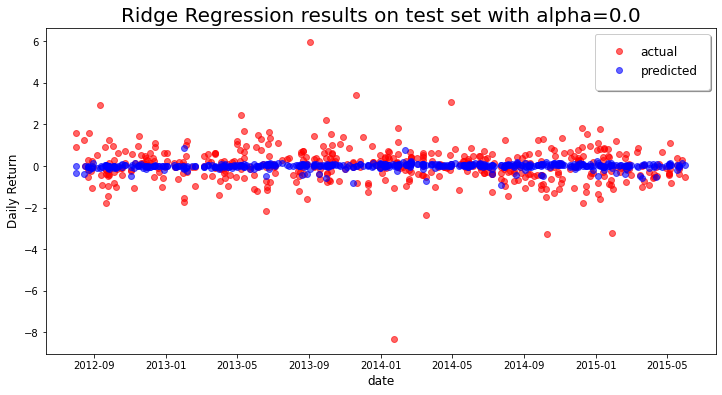

Out of sample Mean Squared Error: 0.784756113531759


In [ ]:
# validation test
rid_y_test_hat=best_alpha_reg.predict(x_test)

plt.figure(figsize=(12, 6))
#plt.scatter(,y_test,color='r', alpha=0.6,label="Ridge")
plt.plot_date(dates,y_test,color='r', alpha=0.6,label="actual")
plt.plot_date(dates,rid_y_test_hat,color='b', alpha=0.6,label="predicted")
#plt.scatter(y_test, rid_y_test_hat,color='r', alpha=0.6,label="Ridge")
#plt.scatter(y_test, y_test_hat,color='b', alpha=0.6,label="Linear")
plt.xlabel('date',size=12)
plt.ylabel('Daily Return',size=12)
plt.legend(fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title('Ridge Regression results on test set with alpha={}'.format(alpha_good),size=20)
plt.show()

print('Out of sample Mean Squared Error:', metrics.mean_squared_error(y_test, rid_y_test_hat))

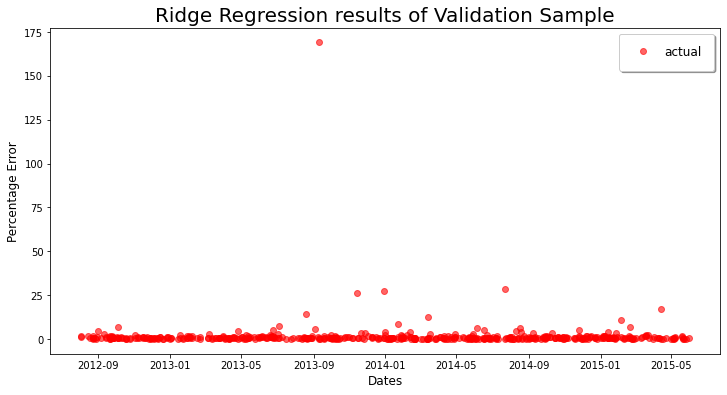

Out of sample Mean Squared Error: 0.784756113531759


In [ ]:
# validation test
rid_y_test_hat=best_alpha_reg.predict(x_test)

plt.figure(figsize=(12, 6))
#plt.scatter(,y_test,color='r', alpha=0.6,label="Ridge")
plt.plot_date(dates,np.abs(y_test-rid_y_test_hat/y_test),color='r', alpha=0.6,label="actual")
#plt.scatter(y_test, rid_y_test_hat,color='r', alpha=0.6,label="Ridge")
#plt.scatter(y_test, y_test_hat,color='b', alpha=0.6,label="Linear")
plt.xlabel('Dates',size=12)
plt.ylabel('Percentage Error',size=12)
plt.legend(fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title('Ridge Regression results of Validation Sample',size=20)
plt.show()

print('Out of sample Mean Squared Error:', metrics.mean_squared_error(y_test, rid_y_test_hat))

##### all data reduced features

create a test and training set.

In [ ]:
x_train=dateex(combo_v3_red,start_date = '03-10-2008',end_date = '06-01-2012').sample(2000,random_state=57)[X_col_red].drop(columns='daily_return')
y_train=dateex(combo_v3_red,start_date = '03-10-2008',end_date = '06-01-2012').sample(2000,random_state=57)['daily_return']
dates_train=dateex(combo_v3_red,start_date = '03-10-2008',end_date = '06-01-2012').sample(2000,random_state=57)['date']
x_test=dateex(combo_v3_red,start_date = '08-01-2012',end_date = '06-01-2015').sample(500,random_state=68)[X_col_red].drop(columns='daily_return')
y_test=dateex(combo_v3_red,start_date = '08-01-2012',end_date = '06-01-2015').sample(500,random_state=68)['daily_return']
dates=dateex(combo_v3_red,start_date = '08-01-2012',end_date = '06-01-2015').sample(500,random_state=68)['date']

Fit ridge regression wih optimised alpha.

In [ ]:
from sklearn import linear_model
from sklearn import metrics
alpha_good=0.5
reg = linear_model.Ridge(alpha=0.5)
reg.fit(x_train,y_train)
y_train_hat=reg.predict(x_train)
w_old=metrics.mean_squared_error(y_train, y_train_hat)
for x in range(10000):
    reg = linear_model.Ridge(alpha=x*0.0001)
    reg.fit(x_train,y_train)
    y_train_hat=reg.predict(x_train)
    w= metrics.mean_squared_error(y_train, y_train_hat)
    if w<w_old:
        alpha_good=x*0.0001
        w_old=w
best_alpha_reg = linear_model.Ridge(alpha=alpha_good)
best_alpha_reg.fit(x_train,y_train)
y_train_hat_rid=best_alpha_reg.predict(x_train)
print('In of sample Mean Squared Error:', w_old)
print('Best Alpha:',alpha_good)

In of sample Mean Squared Error: 1.399984169283161
Best Alpha: 0.0


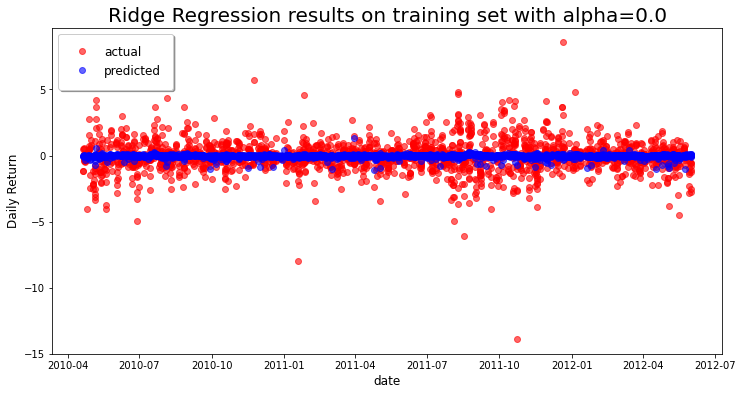

Out of sample Mean Squared Error: 0.784756113531759


In [ ]:
# validation test
rid_y_train_hat=best_alpha_reg.predict(x_train)

plt.figure(figsize=(12, 6))
#plt.scatter(,y_test,color='r', alpha=0.6,label="Ridge")
plt.plot_date(dates_train,y_train,color='r', alpha=0.6,label="actual")
plt.plot_date(dates_train,rid_y_train_hat,color='b', alpha=0.6,label="predicted")
#plt.scatter(y_test, rid_y_test_hat,color='r', alpha=0.6,label="Ridge")
#plt.scatter(y_test, y_test_hat,color='b', alpha=0.6,label="Linear")
plt.xlabel('date',size=12)
plt.ylabel('Daily Return',size=12)
plt.legend(fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title('Ridge Regression results on training set with alpha={}'.format(alpha_good),size=20)
plt.show()

print('Out of sample Mean Squared Error:', metrics.mean_squared_error(y_test, rid_y_test_hat))

reducing the features does not seem to effect results too much.

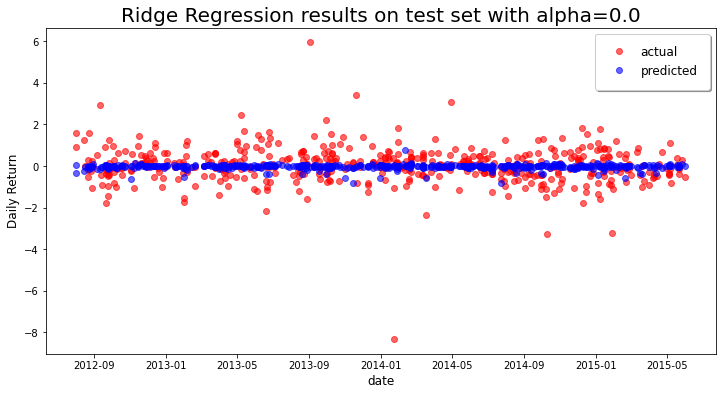

Out of sample Mean Squared Error: 0.7799289628142817


In [ ]:
# validation test
rid_y_test_hat=best_alpha_reg.predict(x_test)

plt.figure(figsize=(12, 6))
#plt.scatter(,y_test,color='r', alpha=0.6,label="Ridge")
plt.plot_date(dates,y_test,color='r', alpha=0.6,label="actual")
plt.plot_date(dates,rid_y_test_hat,color='b', alpha=0.6,label="predicted")
#plt.scatter(y_test, rid_y_test_hat,color='r', alpha=0.6,label="Ridge")
#plt.scatter(y_test, y_test_hat,color='b', alpha=0.6,label="Linear")
plt.xlabel('date',size=12)
plt.ylabel('Daily Return',size=12)
plt.legend(fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title('Ridge Regression results on test set with alpha={}'.format(alpha_good),size=20)
plt.show()

print('Out of sample Mean Squared Error:', metrics.mean_squared_error(y_test, rid_y_test_hat))

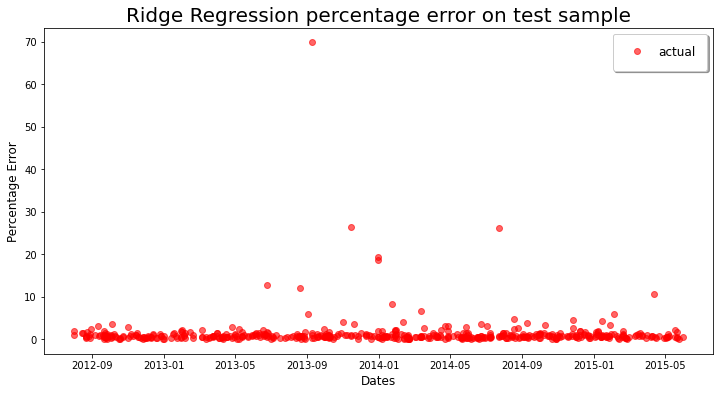

Out of sample Mean Squared Error: 0.7799289628142817


In [ ]:
# validation test
rid_y_test_hat=best_alpha_reg.predict(x_test)

plt.figure(figsize=(12, 6))
#plt.scatter(,y_test,color='r', alpha=0.6,label="Ridge")
plt.plot_date(dates,np.abs(y_test-rid_y_test_hat/y_test),color='r', alpha=0.6,label="actual")
#plt.scatter(y_test, rid_y_test_hat,color='r', alpha=0.6,label="Ridge")
#plt.scatter(y_test, y_test_hat,color='b', alpha=0.6,label="Linear")
plt.xlabel('Dates',size=12)
plt.ylabel('Percentage Error',size=12)
plt.legend(fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title('Ridge Regression percentage error on test sample',size=20)
plt.show()

print('Out of sample Mean Squared Error:', metrics.mean_squared_error(y_test, rid_y_test_hat))

##### stock 1325 reduced features

create a test and training set.

In [ ]:
df_1325=combo_v2[combo_v2['stock_id']=='stock_1325']
scaler = StandardScaler()
X_col=['series_1','series_2','series_3','series_4','series_5','series_6','series_7','series_8','series_9','series_10','series_11','series_12','series_13','series_14','series_15','volume','daily_return']
#remove how any highly correlate varaible >0.80
X_col_red=['series_1','series_2','series_3','series_4','series_6','series_7','series_9','series_12','series_13','series_14','series_15','volume','daily_return']
df_1325[X_col] = scaler.fit_transform(df_1325[X_col]) 


df_1325_red=combo_v2[combo_v2['stock_id']=='stock_1325']
df_1325_red[X_col_red] = scaler.fit_transform(df_1325_red[X_col_red])
for i in X_col:
  if i not in X_col_red:
    df_1325_red.drop(columns=i)


x_train=dateex(df_1325_red,start_date = '03-10-2008',end_date = '06-01-2012')[X_col_red].drop(columns='daily_return')
y_train=dateex(df_1325_red,start_date = '03-10-2008',end_date = '06-01-2012')['daily_return']
dates_train=dateex(df_1325_red,start_date = '03-10-2008',end_date = '06-01-2012')['date']
x_test=dateex(df_1325_red,start_date = '08-01-2012',end_date = '06-01-2015')[X_col_red].drop(columns='daily_return')
y_test=dateex(df_1325_red,start_date = '08-01-2012',end_date = '06-01-2015')['daily_return']
dates=dateex(df_1325_red,start_date = '08-01-2012',end_date = '06-01-2015')['date']

Fit ridge regression wih optimised alpha.

In [ ]:
from sklearn import linear_model
from sklearn import metrics
alpha_good=0.5
reg = linear_model.Ridge(alpha=0.5)
reg.fit(x_train,y_train)
y_train_hat=reg.predict(x_train)
w_old=metrics.mean_squared_error(y_train, y_train_hat)
for x in range(10000):
    reg = linear_model.Ridge(alpha=x*0.0001)
    reg.fit(x_train,y_train)
    y_train_hat=reg.predict(x_train)
    w= metrics.mean_squared_error(y_train, y_train_hat)
    if w<w_old:
        alpha_good=x*0.0001
        w_old=w
best_alpha_reg = linear_model.Ridge(alpha=alpha_good)
best_alpha_reg.fit(x_train,y_train)
y_train_hat_rid=best_alpha_reg.predict(x_train)
print('In of sample Mean Squared Error:', w_old)
print('Best Alpha:',alpha_good)

In of sample Mean Squared Error: 3.12876207828371
Best Alpha: 0.0


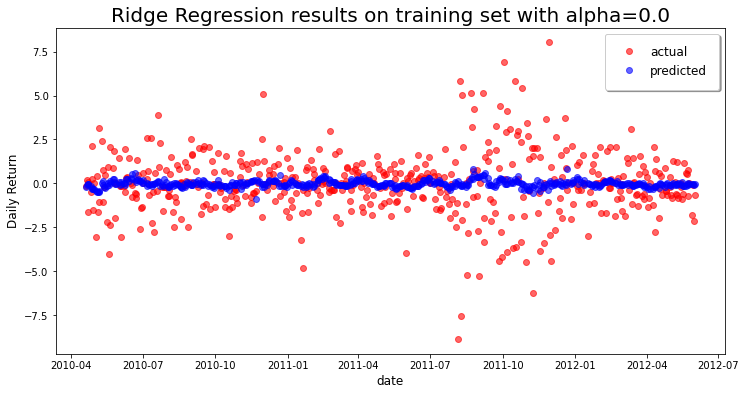

Out of sample Mean Squared Error: 3.12876207828371


In [ ]:
# validation test
rid_y_train_hat=best_alpha_reg.predict(x_train)

plt.figure(figsize=(12, 6))
#plt.scatter(,y_test,color='r', alpha=0.6,label="Ridge")
plt.plot_date(dates_train,y_train,color='r', alpha=0.6,label="actual")
plt.plot_date(dates_train,rid_y_train_hat,color='b', alpha=0.6,label="predicted")
#plt.scatter(y_test, rid_y_test_hat,color='r', alpha=0.6,label="Ridge")
#plt.scatter(y_test, y_test_hat,color='b', alpha=0.6,label="Linear")
plt.xlabel('date',size=12)
plt.ylabel('Daily Return',size=12)
plt.legend(fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title('Ridge Regression results on training set with alpha={}'.format(alpha_good),size=20)
plt.show()

print('Out of sample Mean Squared Error:', metrics.mean_squared_error(y_train, rid_y_train_hat))

reducing the features does not seem to effect results too much.

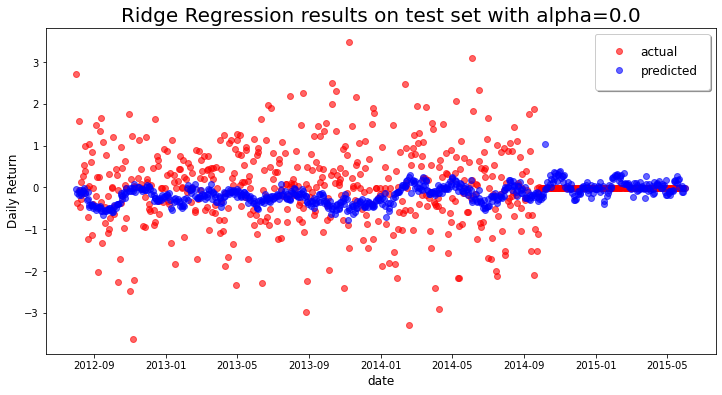

Out of sample Mean Squared Error: 0.8189434986966925


In [ ]:
# validation test
rid_y_test_hat=best_alpha_reg.predict(x_test)

plt.figure(figsize=(12, 6))
#plt.scatter(,y_test,color='r', alpha=0.6,label="Ridge")
plt.plot_date(dates,y_test,color='r', alpha=0.6,label="actual")
plt.plot_date(dates,rid_y_test_hat,color='b', alpha=0.6,label="predicted")
#plt.scatter(y_test, rid_y_test_hat,color='r', alpha=0.6,label="Ridge")
#plt.scatter(y_test, y_test_hat,color='b', alpha=0.6,label="Linear")
plt.xlabel('date',size=12)
plt.ylabel('Daily Return',size=12)
plt.legend(fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title('Ridge Regression results on test set with alpha={}'.format(alpha_good),size=20)
plt.show()

print('Out of sample Mean Squared Error:', metrics.mean_squared_error(y_test, rid_y_test_hat))

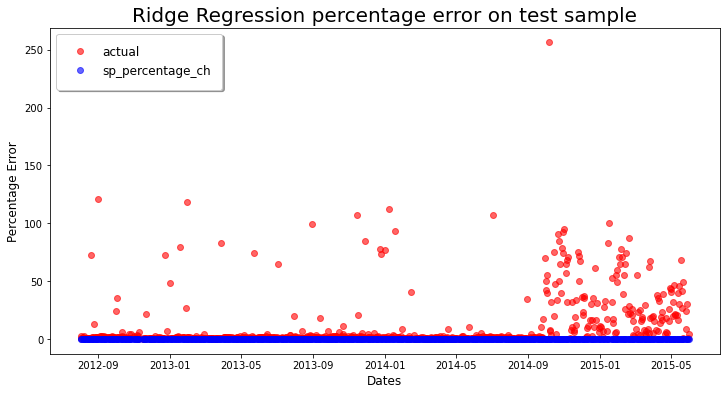

Out of sample Mean Squared Error: 0.8189434986966925


In [ ]:
# validation test
rid_y_test_hat=best_alpha_reg.predict(x_test)

plt.figure(figsize=(12, 6))
#plt.scatter(,y_test,color='r', alpha=0.6,label="Ridge")
plt.plot_date(dates,np.abs(y_test-rid_y_test_hat/y_test),color='r', alpha=0.6,label="actual")
plt.plot_date(dates,dateex(df_1325_red,start_date = '08-01-2012',end_date = '06-01-2015')['sp_percentage_ch'],color='b', alpha=0.6,label='sp_percentage_ch')
#plt.scatter(y_test, rid_y_test_hat,color='r', alpha=0.6,label="Ridge")
#plt.scatter(y_test, y_test_hat,color='b', alpha=0.6,label="Linear")
plt.xlabel('Dates',size=12)
plt.ylabel('Percentage Error',size=12)
plt.legend(fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title('Ridge Regression percentage error on test sample',size=20)
plt.show()

print('Out of sample Mean Squared Error:', metrics.mean_squared_error(y_test, rid_y_test_hat))

In [ ]:
y_test

404967    2.724732
405727   -0.385549
406485    1.588650
407241   -0.063565
407995   -0.460165
            ...   
911535   -0.004068
912354   -0.004068
913173   -0.004068
913993   -0.004068
914816   -0.004068
Name: daily_return, Length: 677, dtype: float64

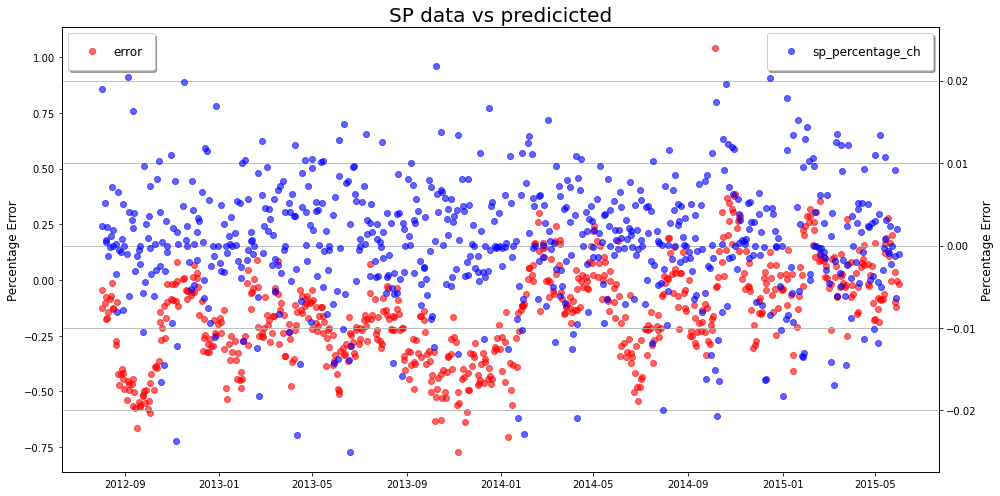

In [ ]:
fig, ax1 = plt.subplots(figsize =(14,7))

ax1.plot_date(dates,rid_y_test_hat,color='r', alpha=0.6,label="error")
ax1.set_ylabel('Percentage Error',size=12)


ax1.tick_params(axis='y')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot_date(dates,dateex(df_1325_red,start_date = '08-01-2012',end_date = '06-01-2015')['sp_percentage_ch'],color='b', alpha=0.6,label='sp_percentage_ch')
ax2.set_xlabel('Dates',size=12)
ax2.set_ylabel('Percentage Error',size=12)

plt.title('SP data vs predicicted',fontsize=20)
ax1.legend(loc="upper left", fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax2.legend(loc="upper right", fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig.tight_layout() # otherwise the right y-label is slightly clipped
plt.grid(b=None) 
plt.show()

### Ridge Sign Classifier stock 1325 all features 

Create a test and training set excluding 2014 data onwards.

In [ ]:
df_1325=combo_v2[combo_v2['stock_id']=='stock_1325']
scaler = StandardScaler()
X_col=['series_1','series_2','series_3','series_4','series_5','series_6','series_7','series_8','series_9','series_10','series_11','series_12','series_13','series_14','series_15','volume','daily_return']
#remove how any highly correlate varaible >0.80
X_col_red=['series_1','series_2','series_3','series_4','series_6','series_7','series_9','series_12','series_13','series_14','series_15','volume','daily_return']
df_1325[X_col] = scaler.fit_transform(df_1325[X_col]) 


df_1325_red=combo_v2[combo_v2['stock_id']=='stock_1325']
df_1325_red[X_col_red] = scaler.fit_transform(df_1325_red[X_col_red])
for i in X_col:
  if i not in X_col_red:
    df_1325_red.drop(columns=i)


x_train=dateex(df_1325_red,start_date = '03-10-2008',end_date = '06-01-2012')[X_col_red].drop(columns='daily_return')
y_train=dateex(df_1325_red,start_date = '03-10-2008',end_date = '06-01-2012')['sign_daily_return']
dates_train=dateex(df_1325_red,start_date = '03-10-2008',end_date = '06-01-2012')['date']
x_test=dateex(df_1325_red,start_date = '08-01-2012',end_date = '06-01-2014')[X_col_red].drop(columns='daily_return')
y_test=dateex(df_1325_red,start_date = '08-01-2012',end_date = '06-01-2014')['sign_daily_return']
dates=dateex(df_1325_red,start_date = '08-01-2012',end_date = '06-01-2014')['date']

Fit ridge regression wih optimised alpha.

In [ ]:
from sklearn import linear_model
from sklearn import metrics
alpha_good=0.5
reg = linear_model.RidgeClassifier(alpha=0.5)
reg.fit(x_train,y_train)
y_train_hat=reg.predict(x_train)
w_old=metrics.mean_squared_error(y_train, y_train_hat)
for x in range(10000):
    reg = linear_model.RidgeClassifier(alpha=x*0.0001)
    reg.fit(x_train,y_train)
    y_train_hat=reg.predict(x_train)
    w= metrics.mean_squared_error(y_train, y_train_hat)
    if w<w_old:
        alpha_good=x*0.0001
        w_old=w
best_alpha_reg = linear_model.RidgeClassifier(alpha=alpha_good)
best_alpha_reg.fit(x_train,y_train)
y_train_hat_rid=best_alpha_reg.predict(x_train)
print('In of sample Mean Squared Error:', w_old)
print('Best Alpha:',alpha_good)

In of sample Mean Squared Error: 1.895145631067961
Best Alpha: 0.5


reducing the features does not seem to effect results too much.

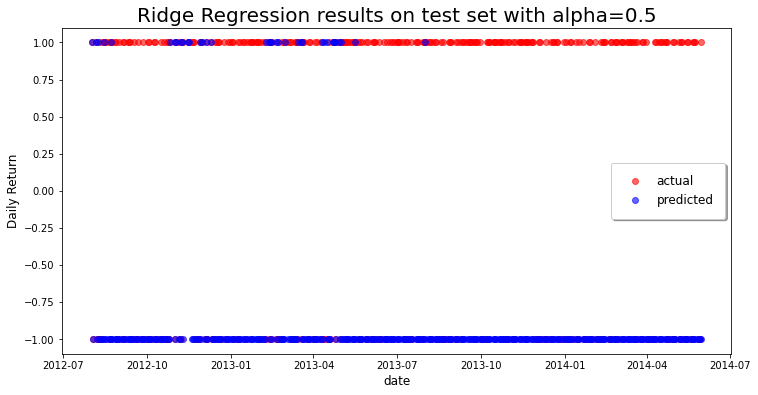

Out of sample Mean Squared Error: 2.1559633027522938


In [ ]:
# validation test
rid_y_test_hat=best_alpha_reg.predict(x_test)

plt.figure(figsize=(12, 6))
#plt.scatter(,y_test,color='r', alpha=0.6,label="Ridge")
plt.plot_date(dates,y_test,color='r', alpha=0.6,label="actual")
plt.plot_date(dates,rid_y_test_hat,color='b', alpha=0.6,label="predicted")
#plt.scatter(y_test, rid_y_test_hat,color='r', alpha=0.6,label="Ridge")
#plt.scatter(y_test, y_test_hat,color='b', alpha=0.6,label="Linear")
plt.xlabel('date',size=12)
plt.ylabel('Daily Return',size=12)
plt.legend(fontsize=12,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title('Ridge Regression results on test set with alpha={}'.format(alpha_good),size=20)
plt.show()

print('Out of sample Mean Squared Error:', metrics.mean_squared_error(y_test, rid_y_test_hat))

In [ ]:
print('Confusion Matrix of predicted values of test set:')
print(metrics.confusion_matrix(y_test, rid_y_test_hat))

Confusion Matrix of predicted values of test set:
[[176  12]
 [223  25]]


As we can see the model is not very good, predominately  classifies the sign change as negative shown celarly by confusion matrix. Iddeally the confusion matrix will have large diagonal value. 

### ARIMA model for stock 1325



In [ ]:
from statsmodels.tsa.stattools import adfuller

df_1325=combo_v2[combo_v2['stock_id']=='stock_1325']
result = adfuller(df_1325['daily_return'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.948756
p-value: 0.000000


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df_1325['daily_return']); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
!pip install pmdarima

In [ ]:
import pmdarima as pm

In [ ]:

model = pm.auto_arima(df_1325['daily_return'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-13517.208, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-13564.742, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-13566.012, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-13563.504, Time=0.34 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-13564.428, Time=0.40 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-13562.500, Time=0.81 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-13564.063, Time=0.78 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 2.836 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2180
Model:               SARIMAX(0, 0, 1)   Log Likelihood                6785.006
Date:                Tue, 10 Nov 2020   AIC                         -13566.012
Time:                        15:53:56   BIC                         -13554.638
Sample:  

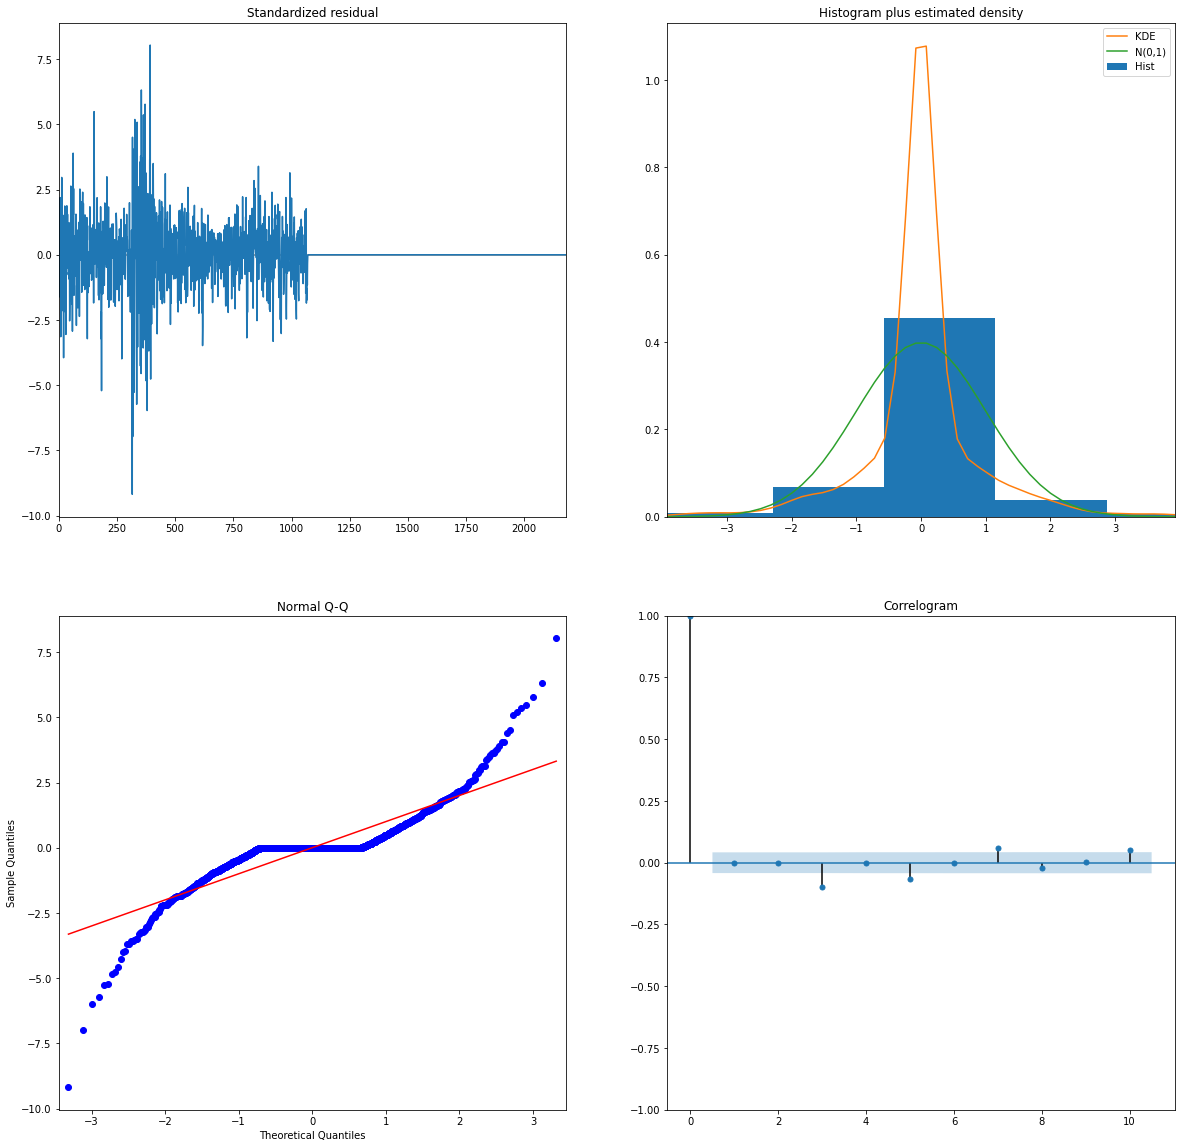

In [ ]:
model.plot_diagnostics(figsize=(20,20))
plt.show()